# HR Employee Attrition

## Motivation
Attrition is a key factor for any HR organization. Research shows that increased talent retention is associated with increased productivity while lower attrition rates are associated with higher sales and financial performance. Additionally, attrition directly impacts the bottom line as researchers have shown that the cost to replace a single worker ranges from 93% to 200% of their annual salary. Combined, this research indicates how important it is for an organization to be able to predict which of their employees will attrit. 

## Guide
To better understand and predict attrition for this organization we will follow these steps:
1. Data Cleaning
2. Exploratory Data Analysis
3. Feature Engineering
4. Model Building
5. Production and Conclusion

## Data Cleaning
We will start by loading the data and then looking at it

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize']=(30,15)
plt.style.use('fivethirtyeight')

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

Let's start with the general information to gain a better understanding of what we are looking at

In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


We can start removing the columns that don't add anything to our analysis

In [13]:
df = df.drop(['EmployeeCount','EmployeeNumber', 'Over18','StandardHours'], axis = 1)

Now let's create a df for the numerical variables. Numerical data are measurements or counts.

In [14]:
df_num = df[['Age',
             'DailyRate',
             'DistanceFromHome',
             'HourlyRate',
             'MonthlyIncome',
             'MonthlyRate',
             'NumCompaniesWorked',
             'PercentSalaryHike',
             'TotalWorkingYears',
             'TrainingTimesLastYear',
             'YearsAtCompany',
             'YearsInCurrentRole',
             'YearsSinceLastPromotion',
             'YearsWithCurrManager']]

Let's start by looking at a histogram 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012B88A21F08>,
      dtype=object)

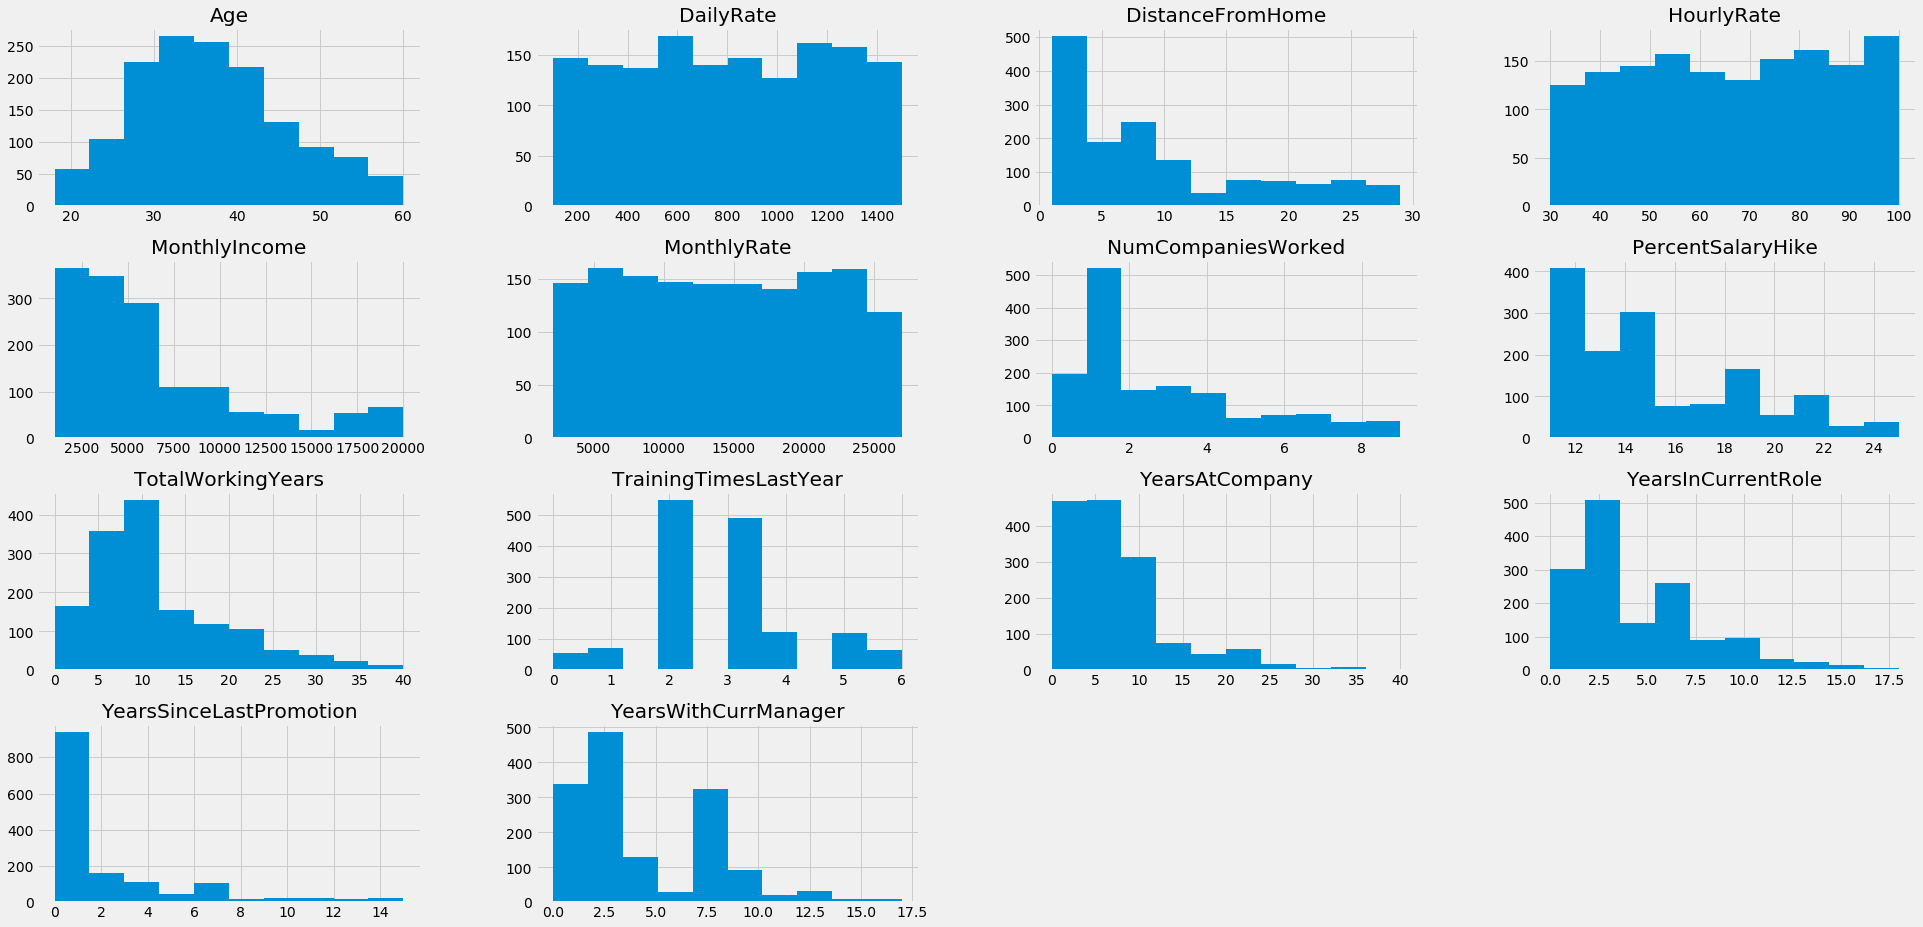

In [15]:
df_num.hist()

We can look at these histograms for anything that sticks out. 
Just a few observations:
Age follows a normal distribution
While Monthly income is what we would expect... there are more people 
at lower ranks who earn less... the daily rate, hourly rate and monthly rate 
don't match that
distance from homw, Monthly Income, Percent Salary Hike, Years at Company, 
Years since last promotion seem to follow roughly an expoential distribution

Next let's look at the boxplots

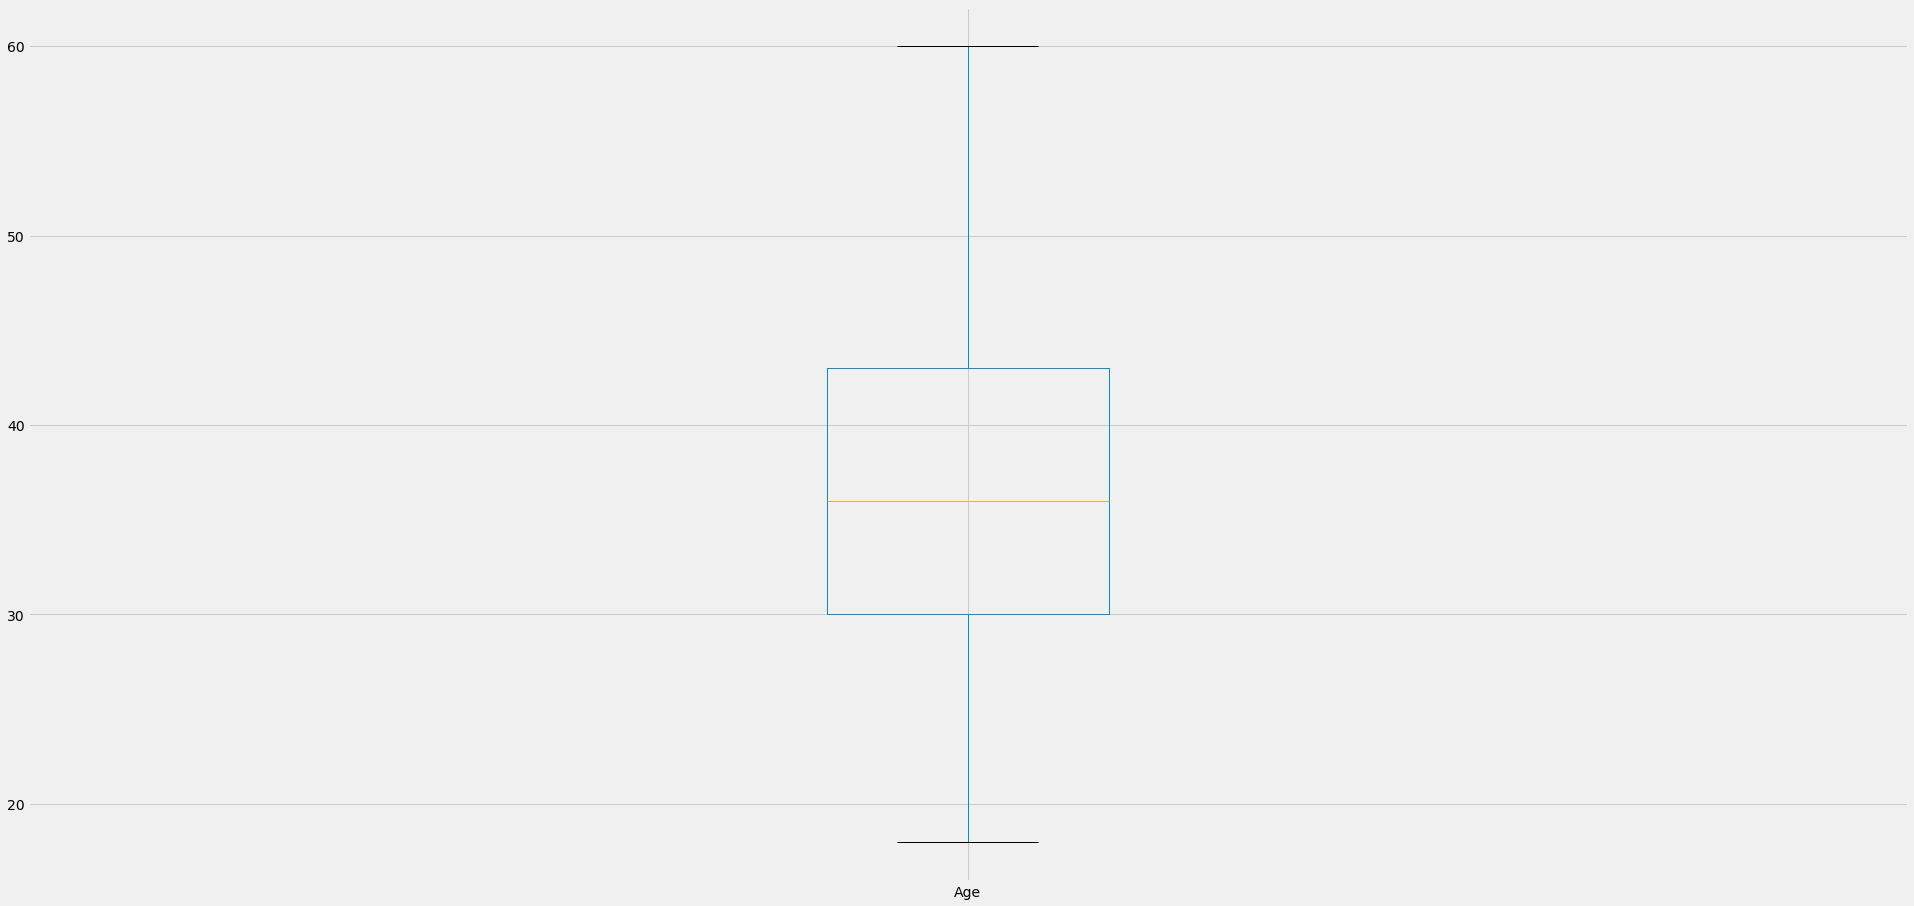

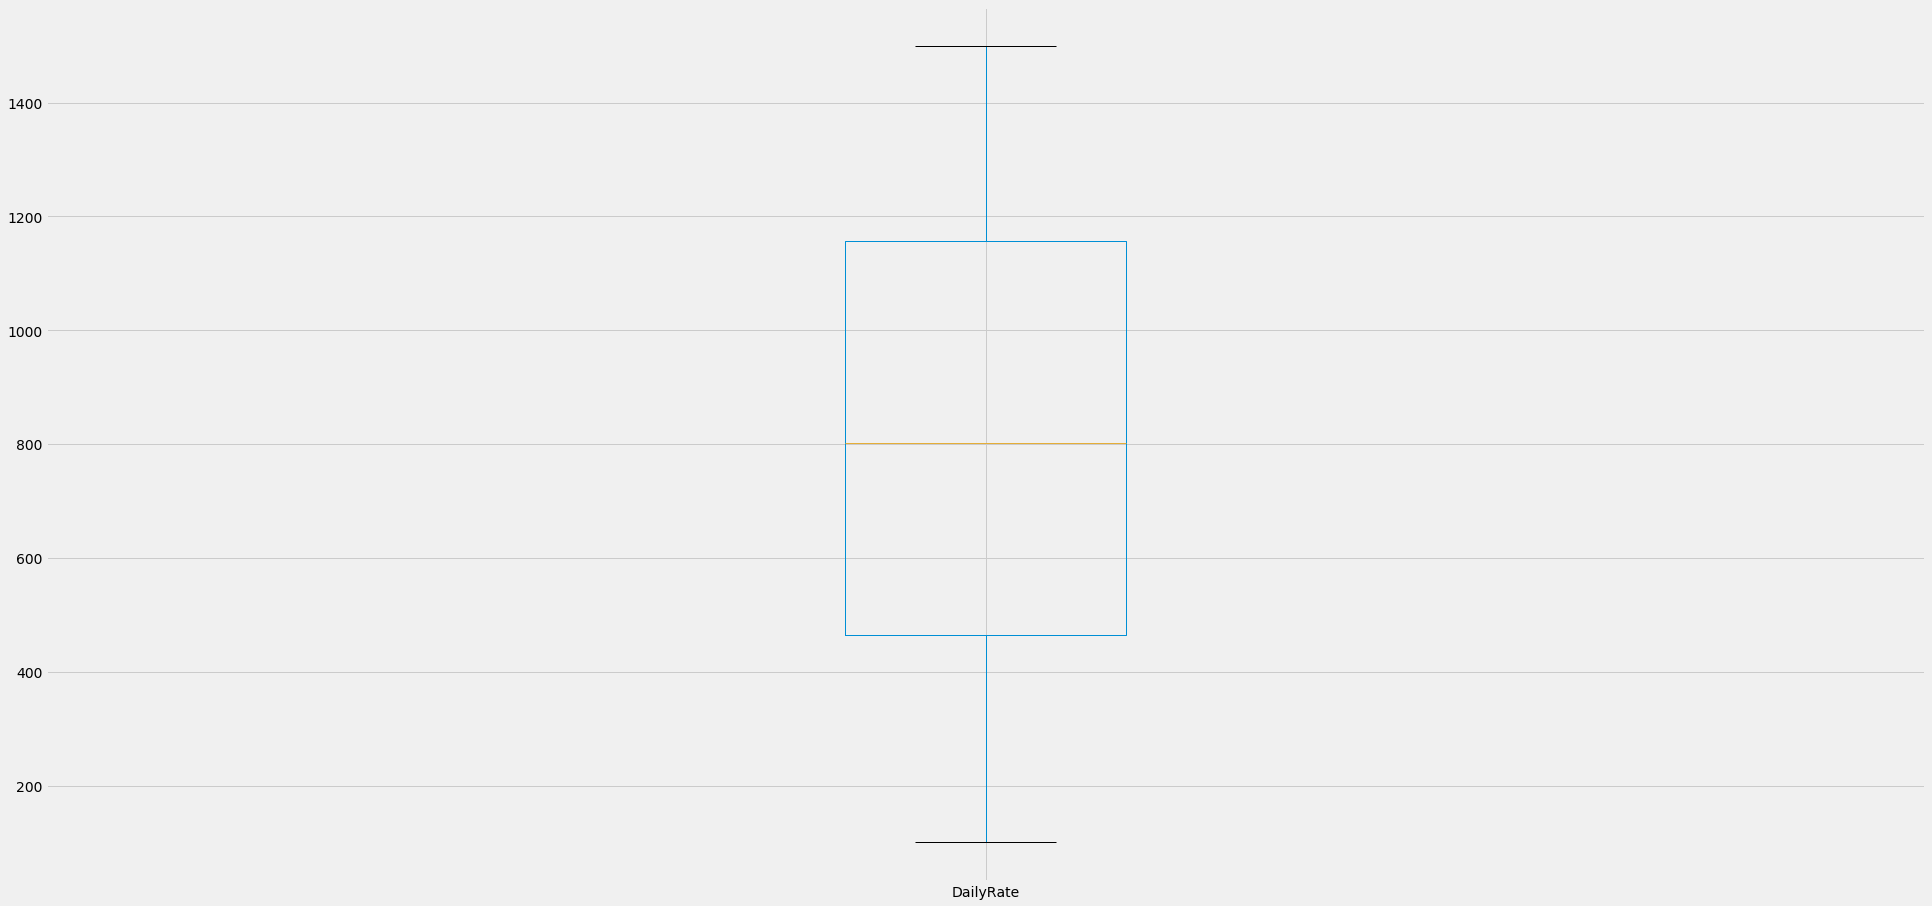

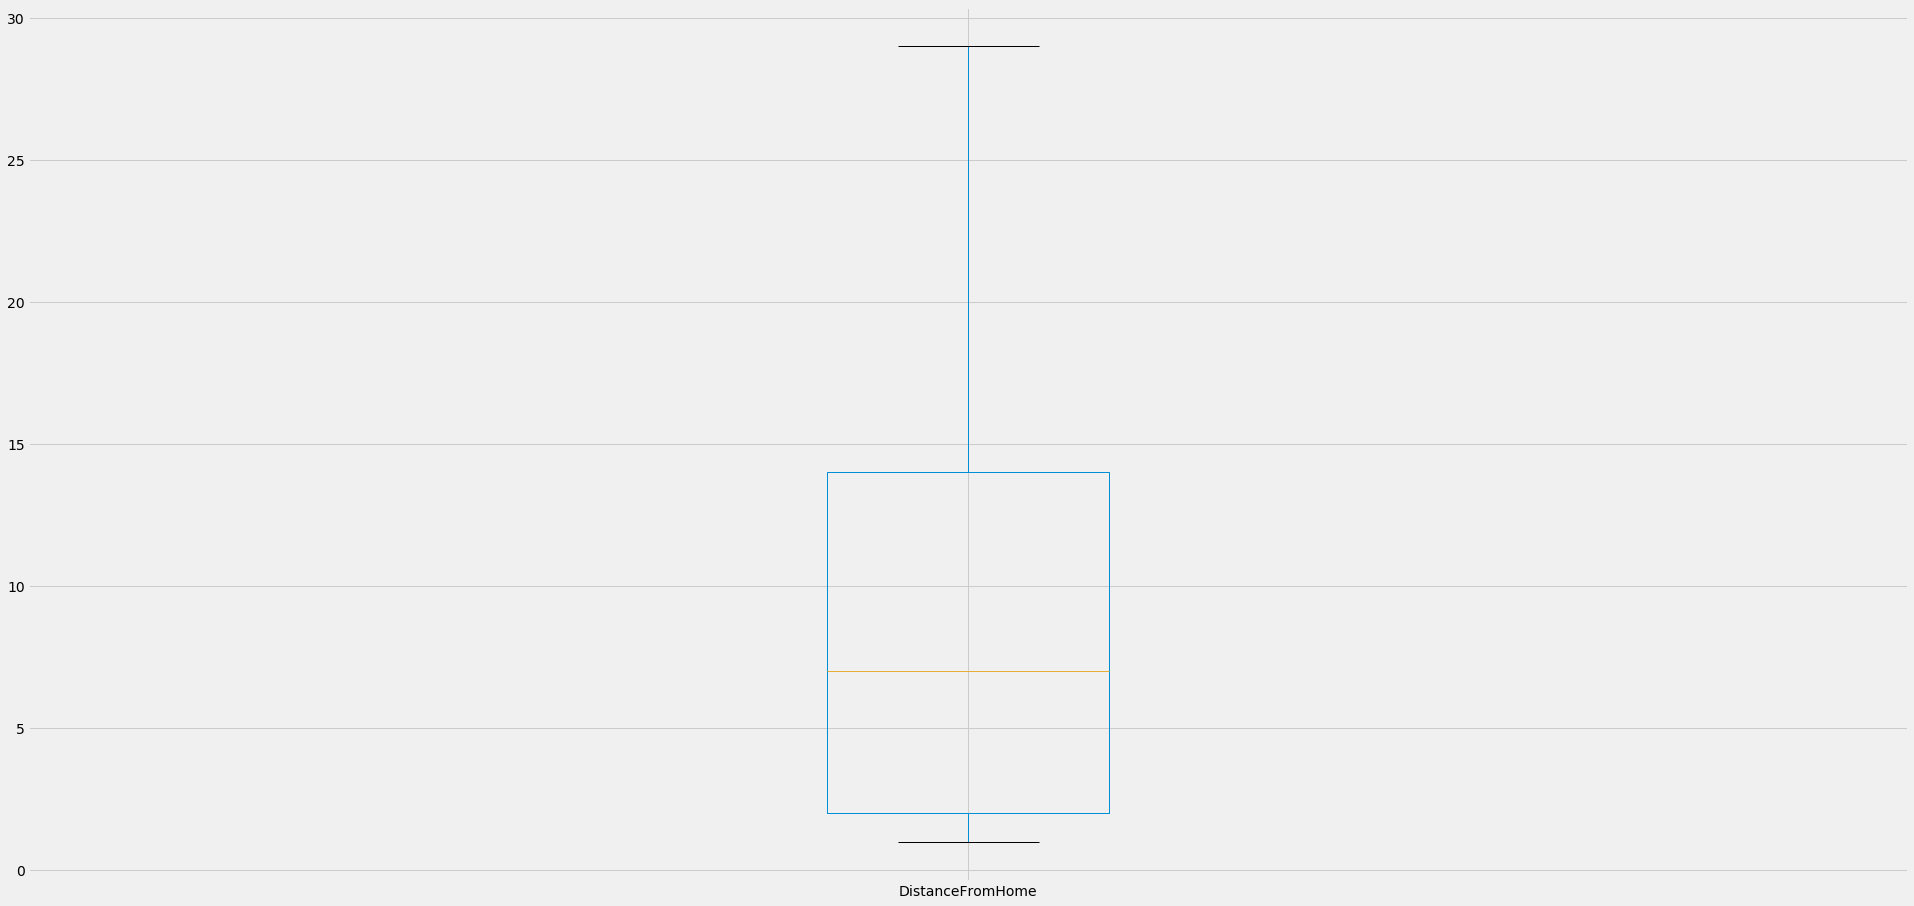

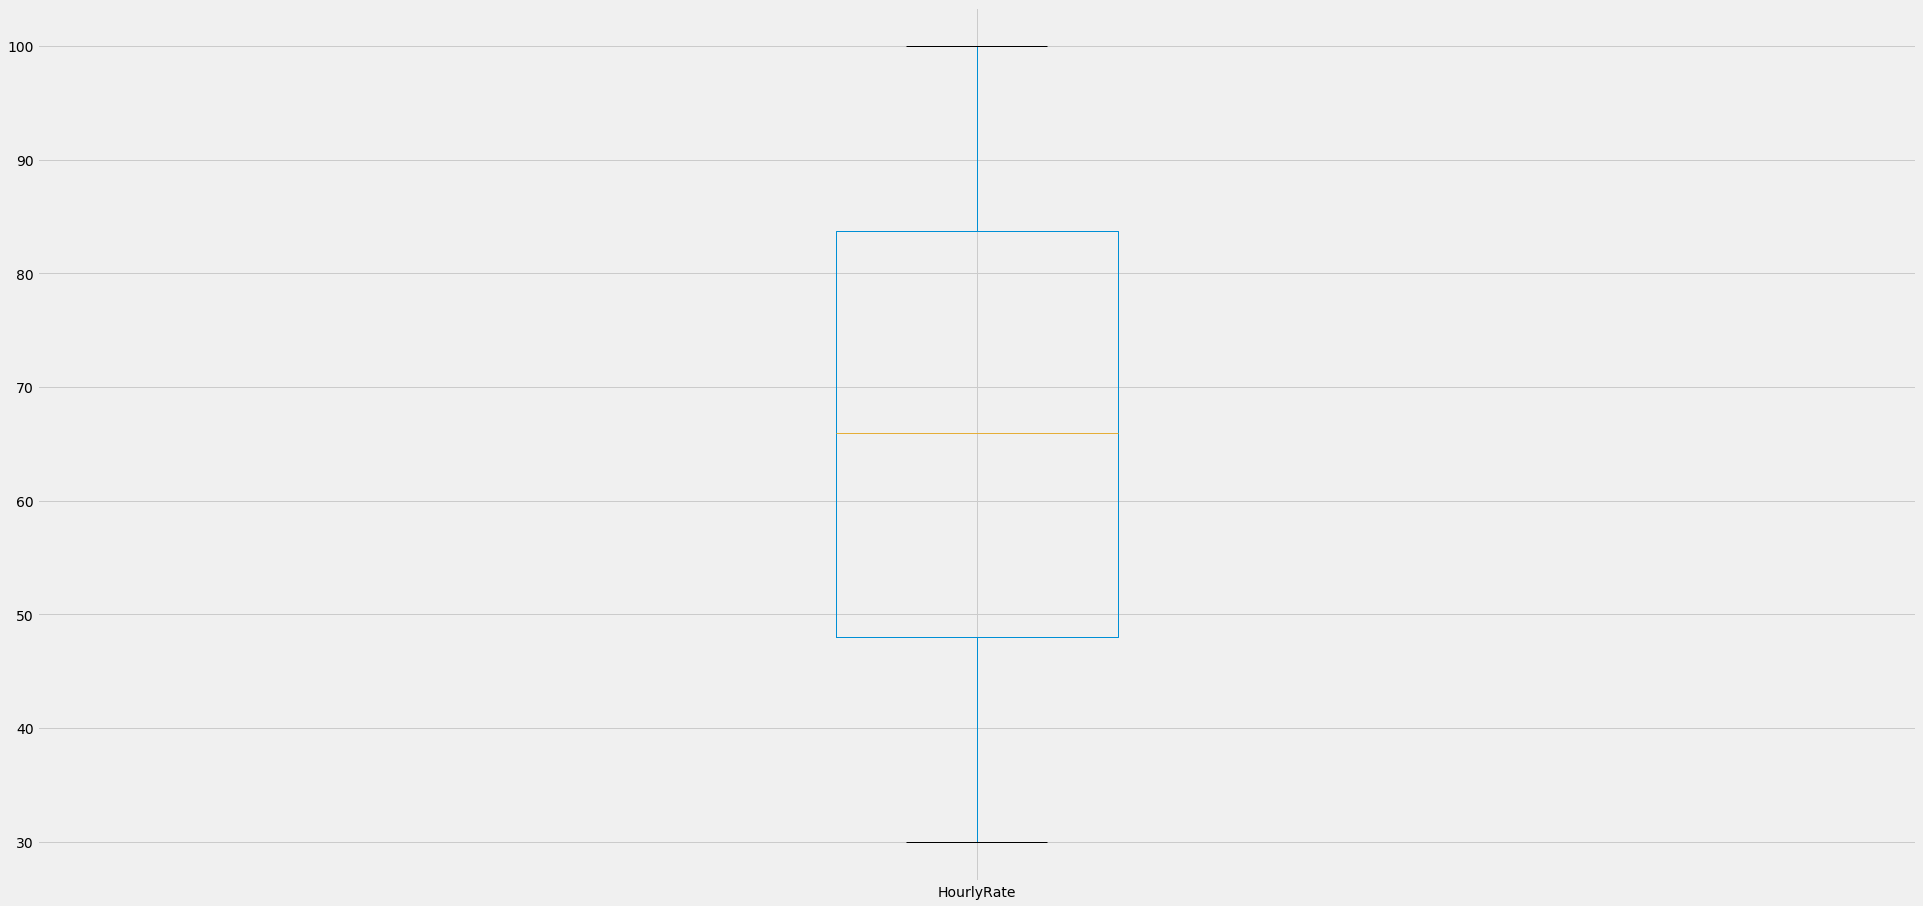

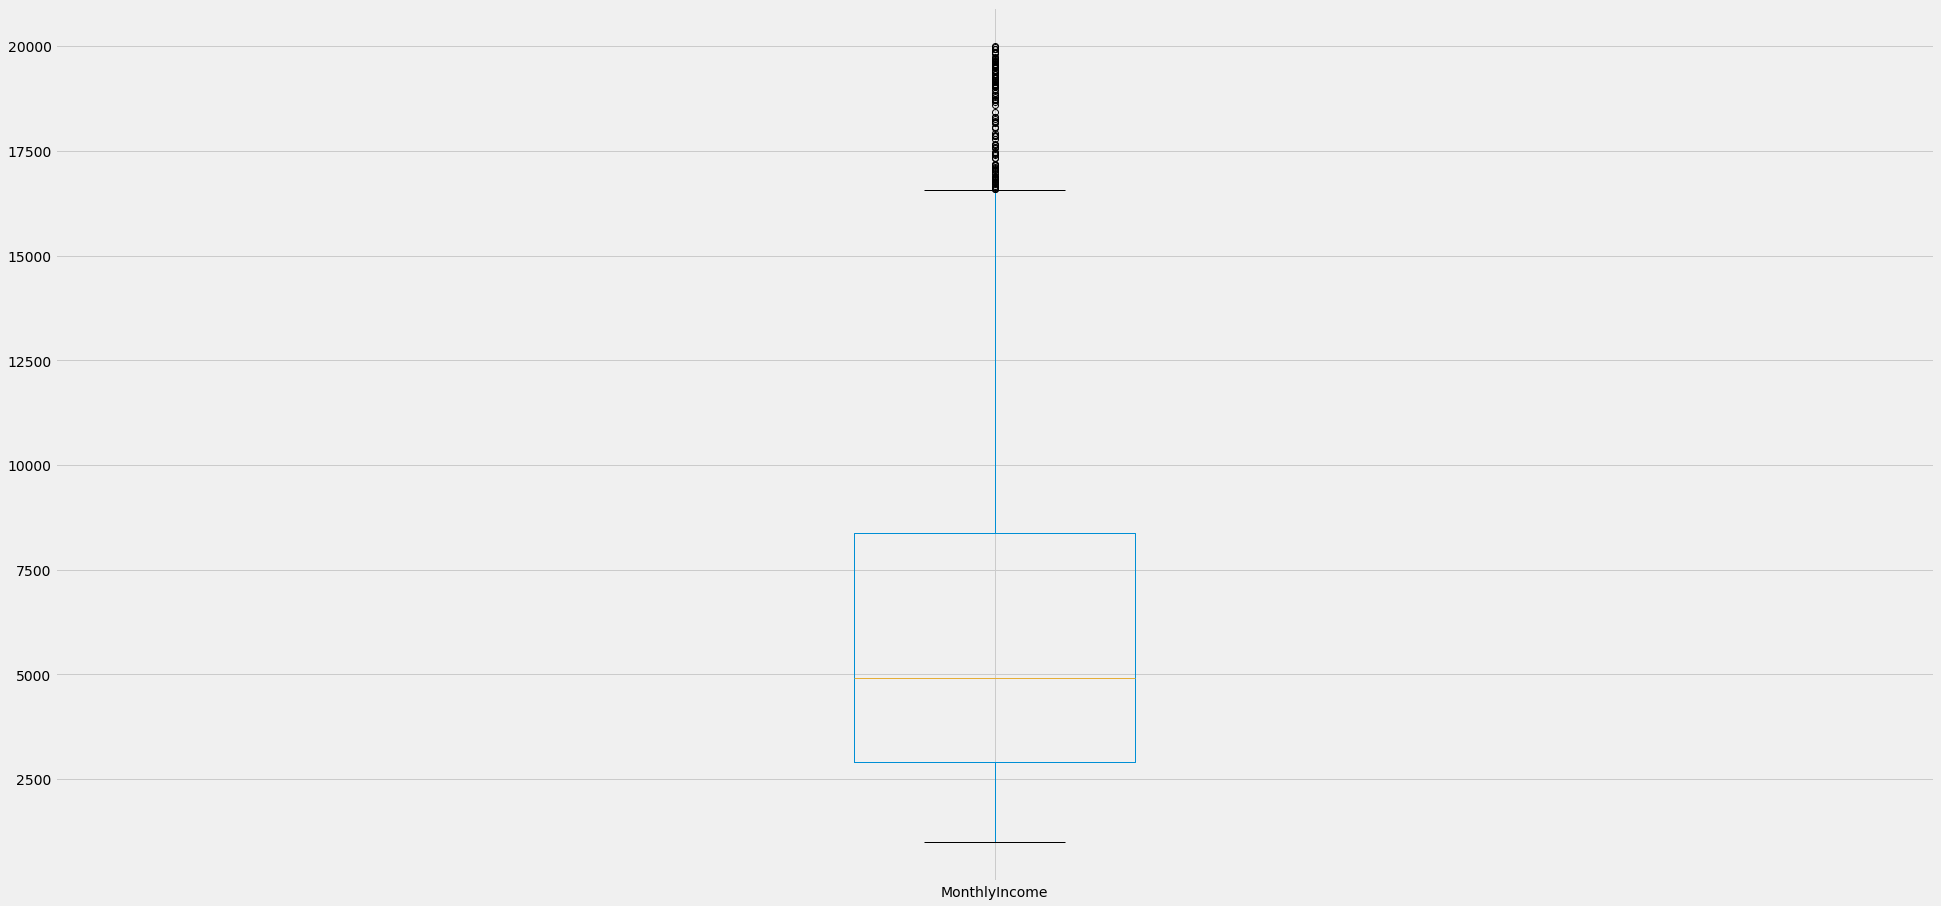

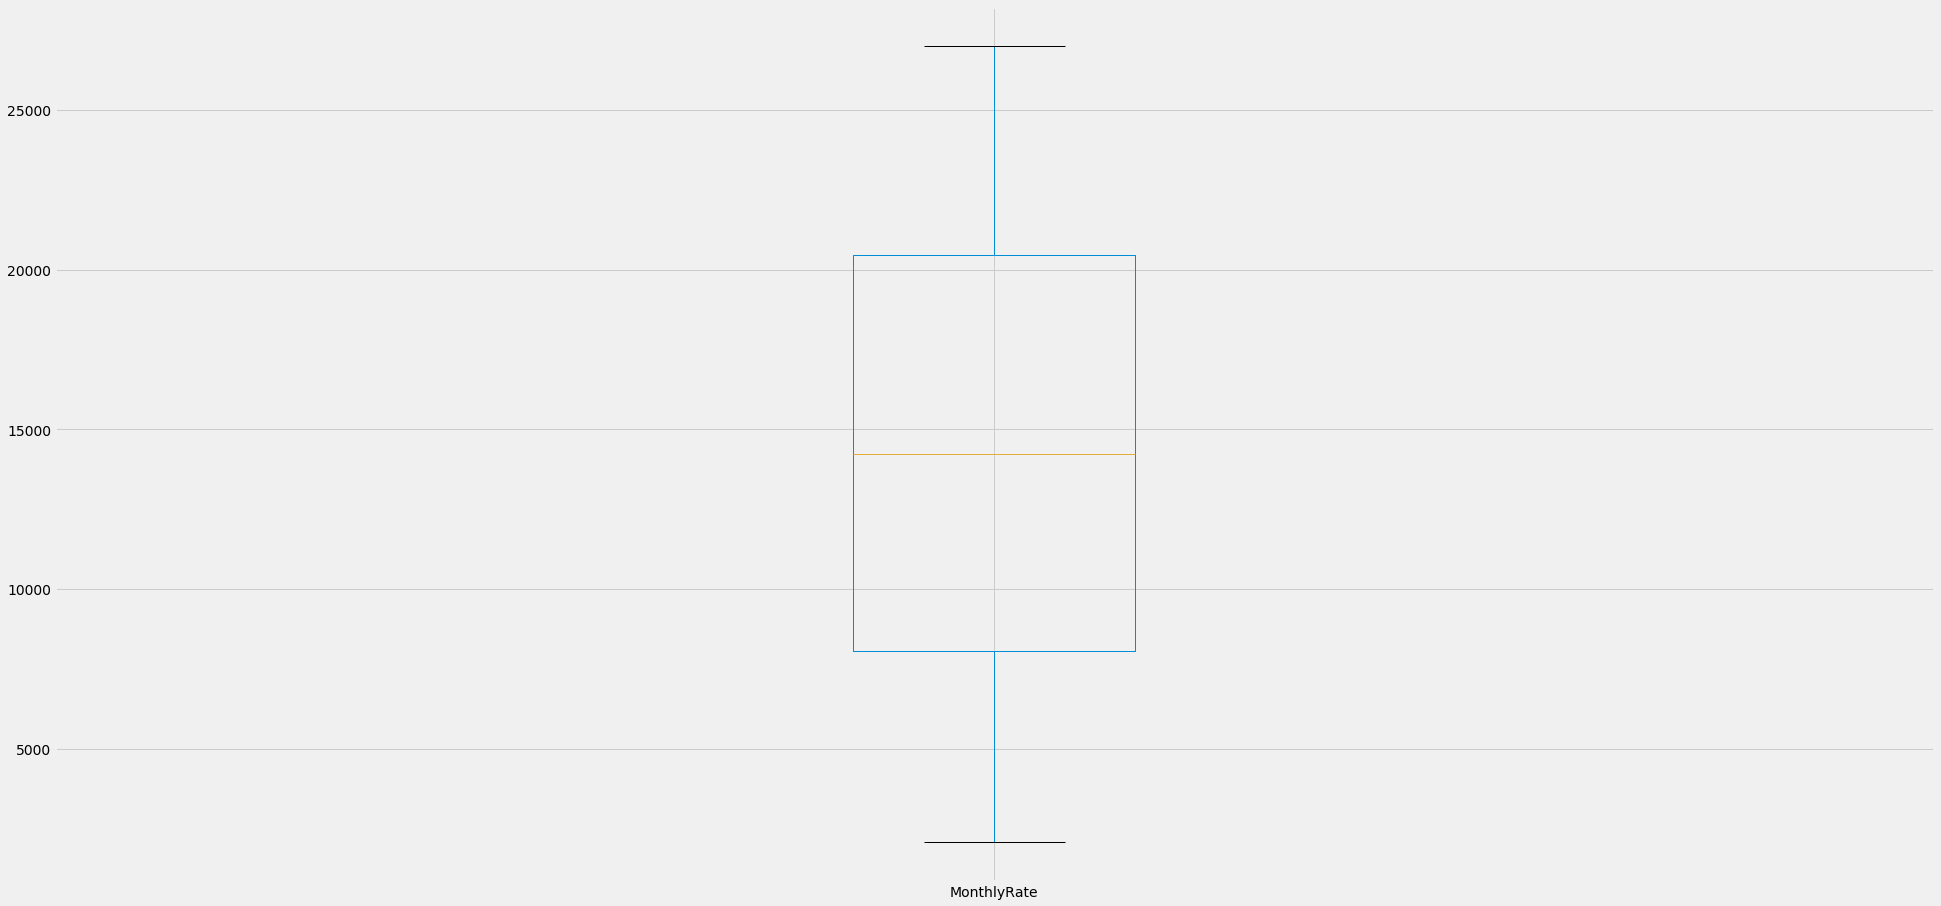

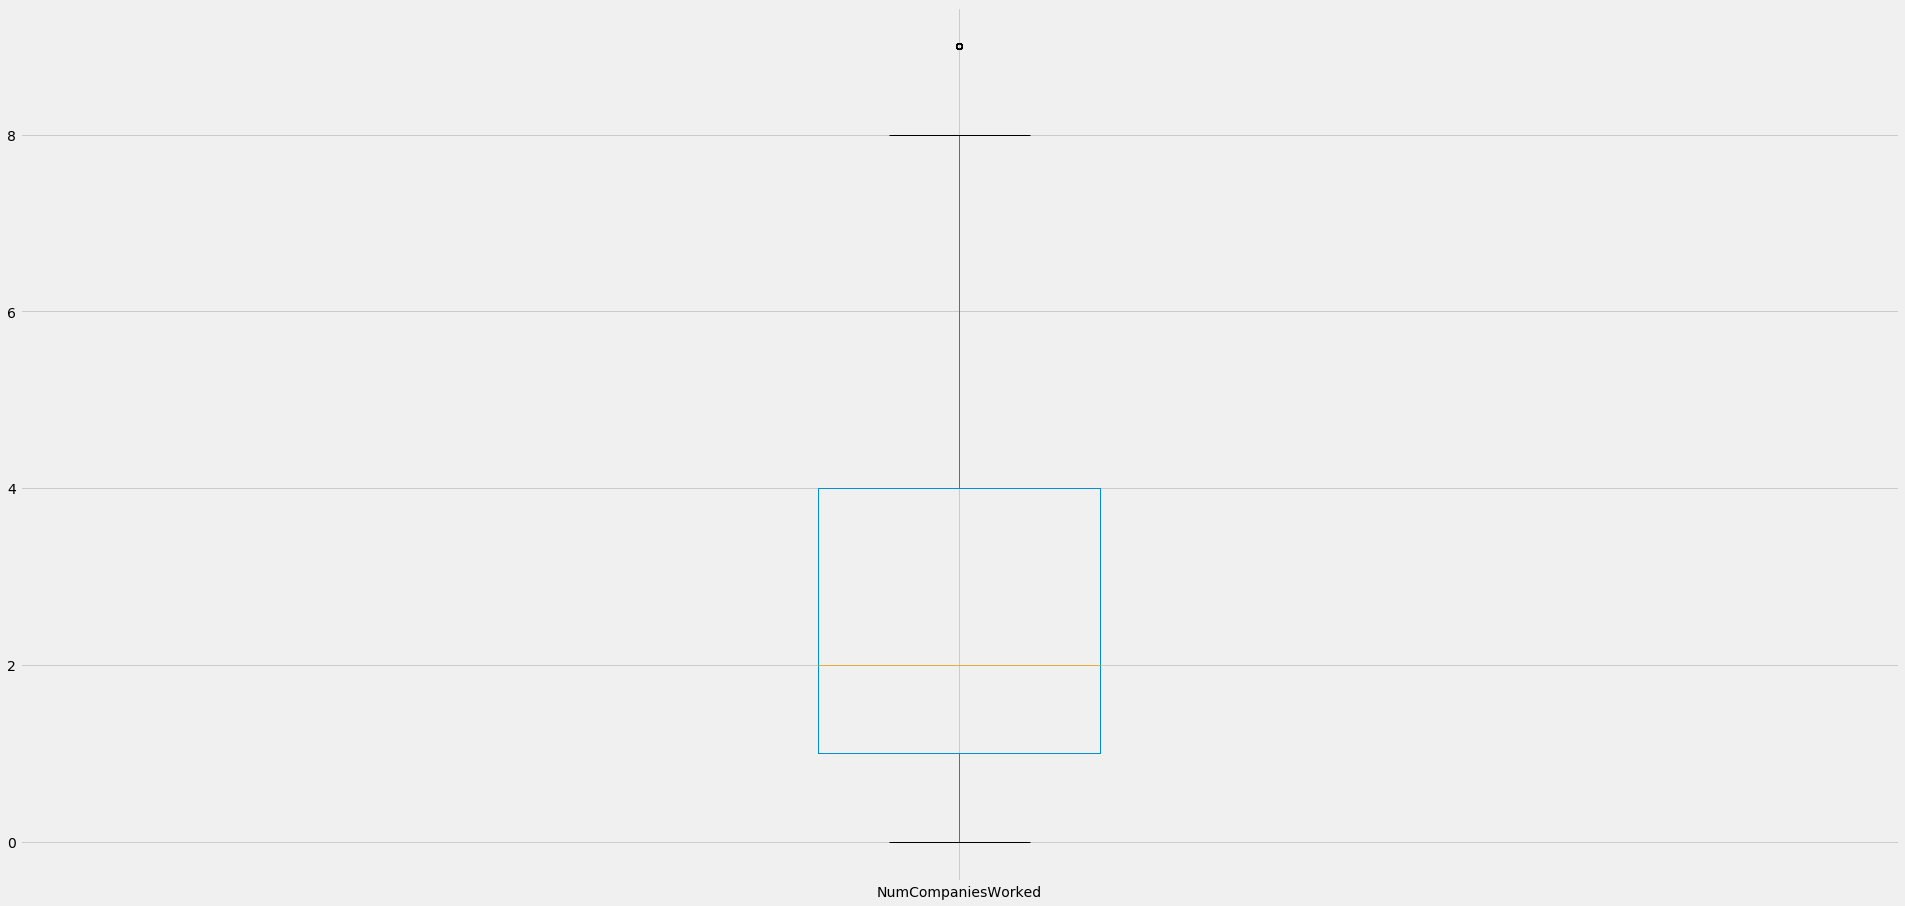

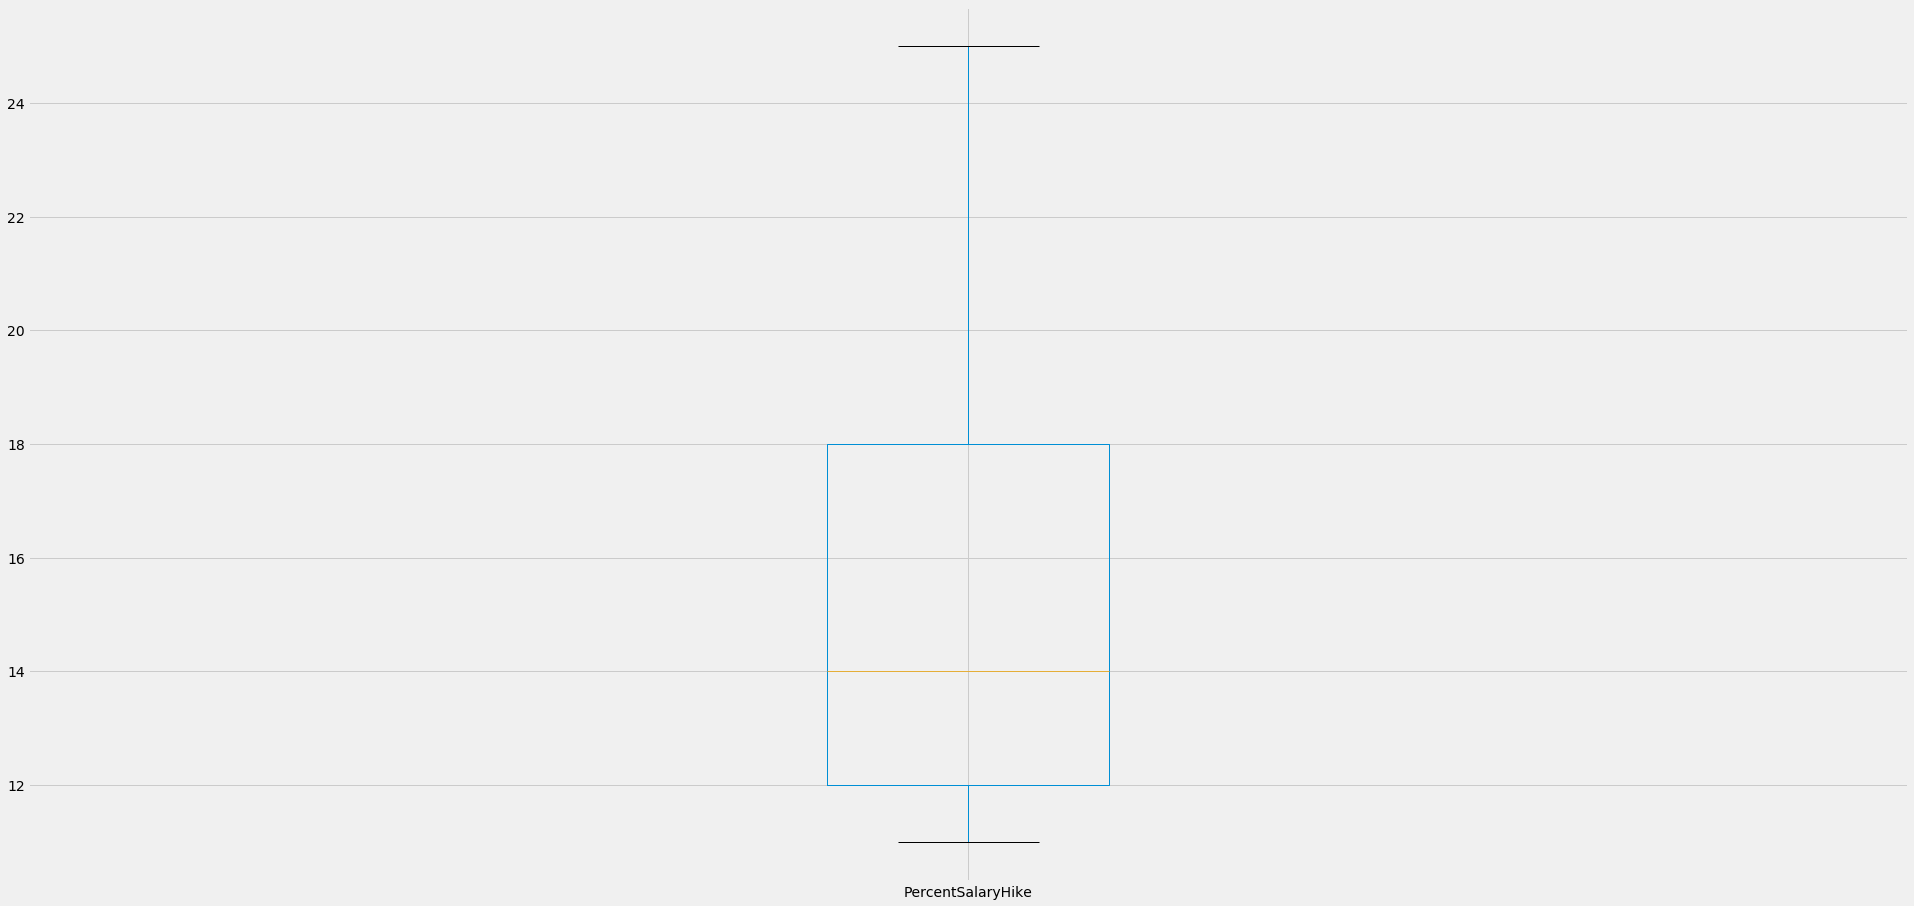

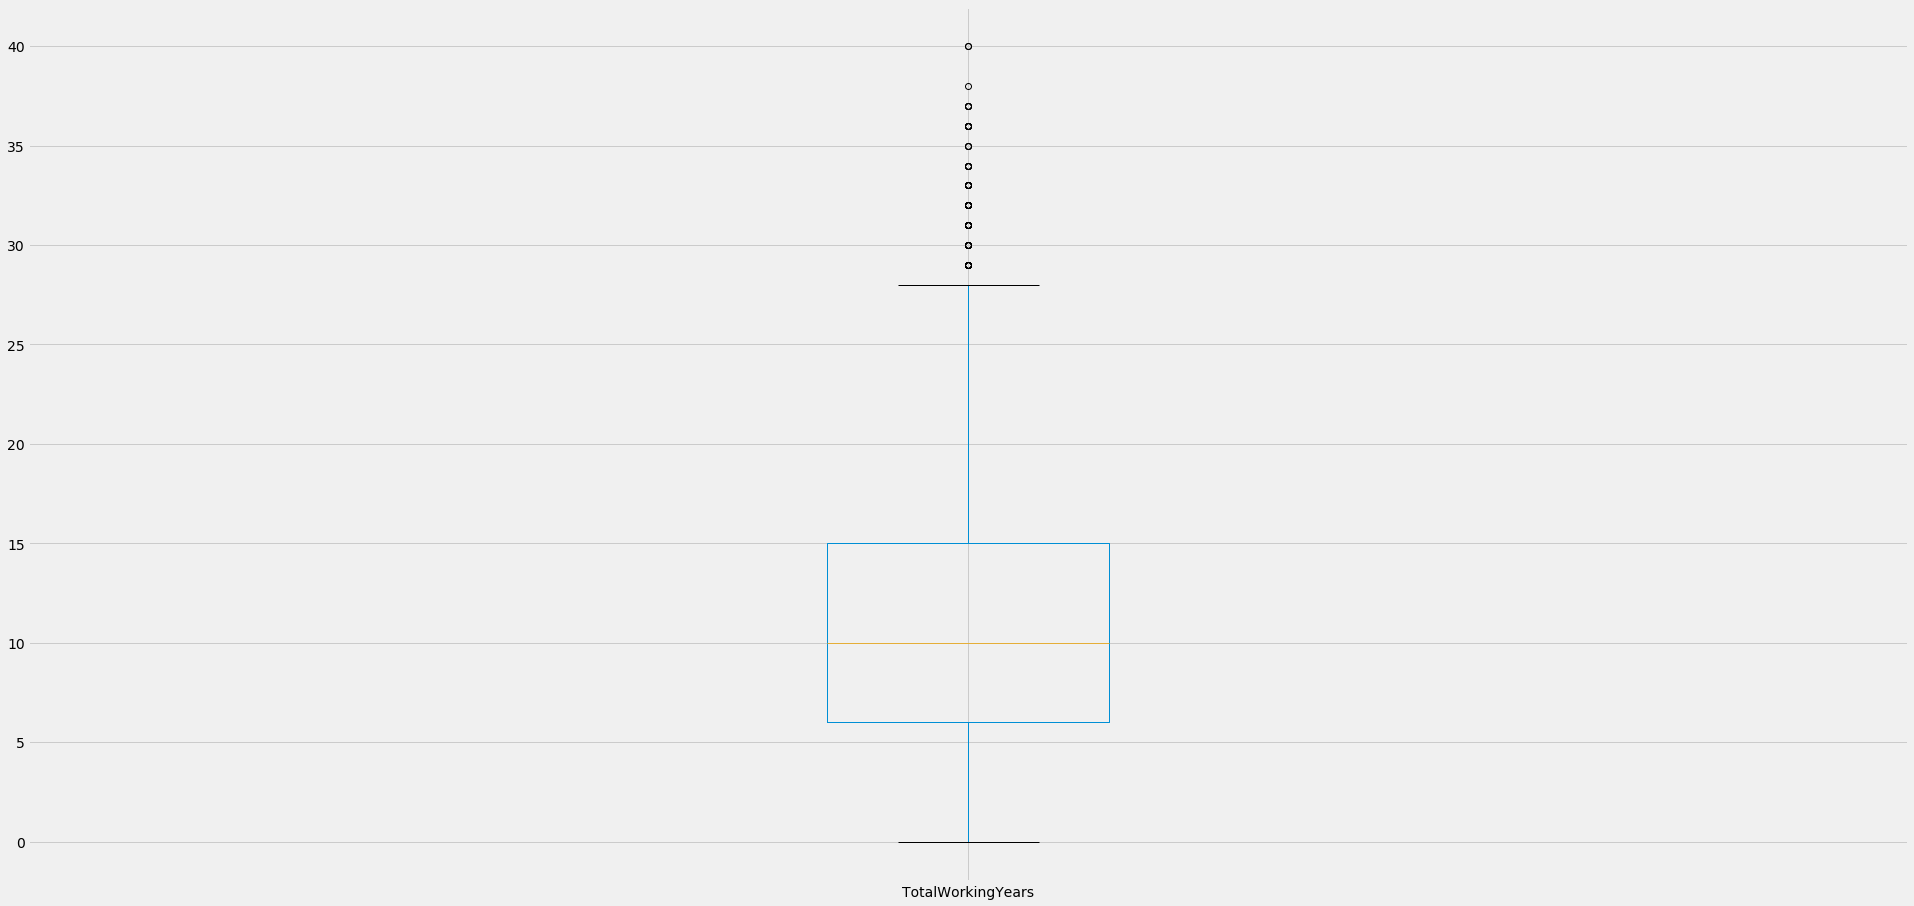

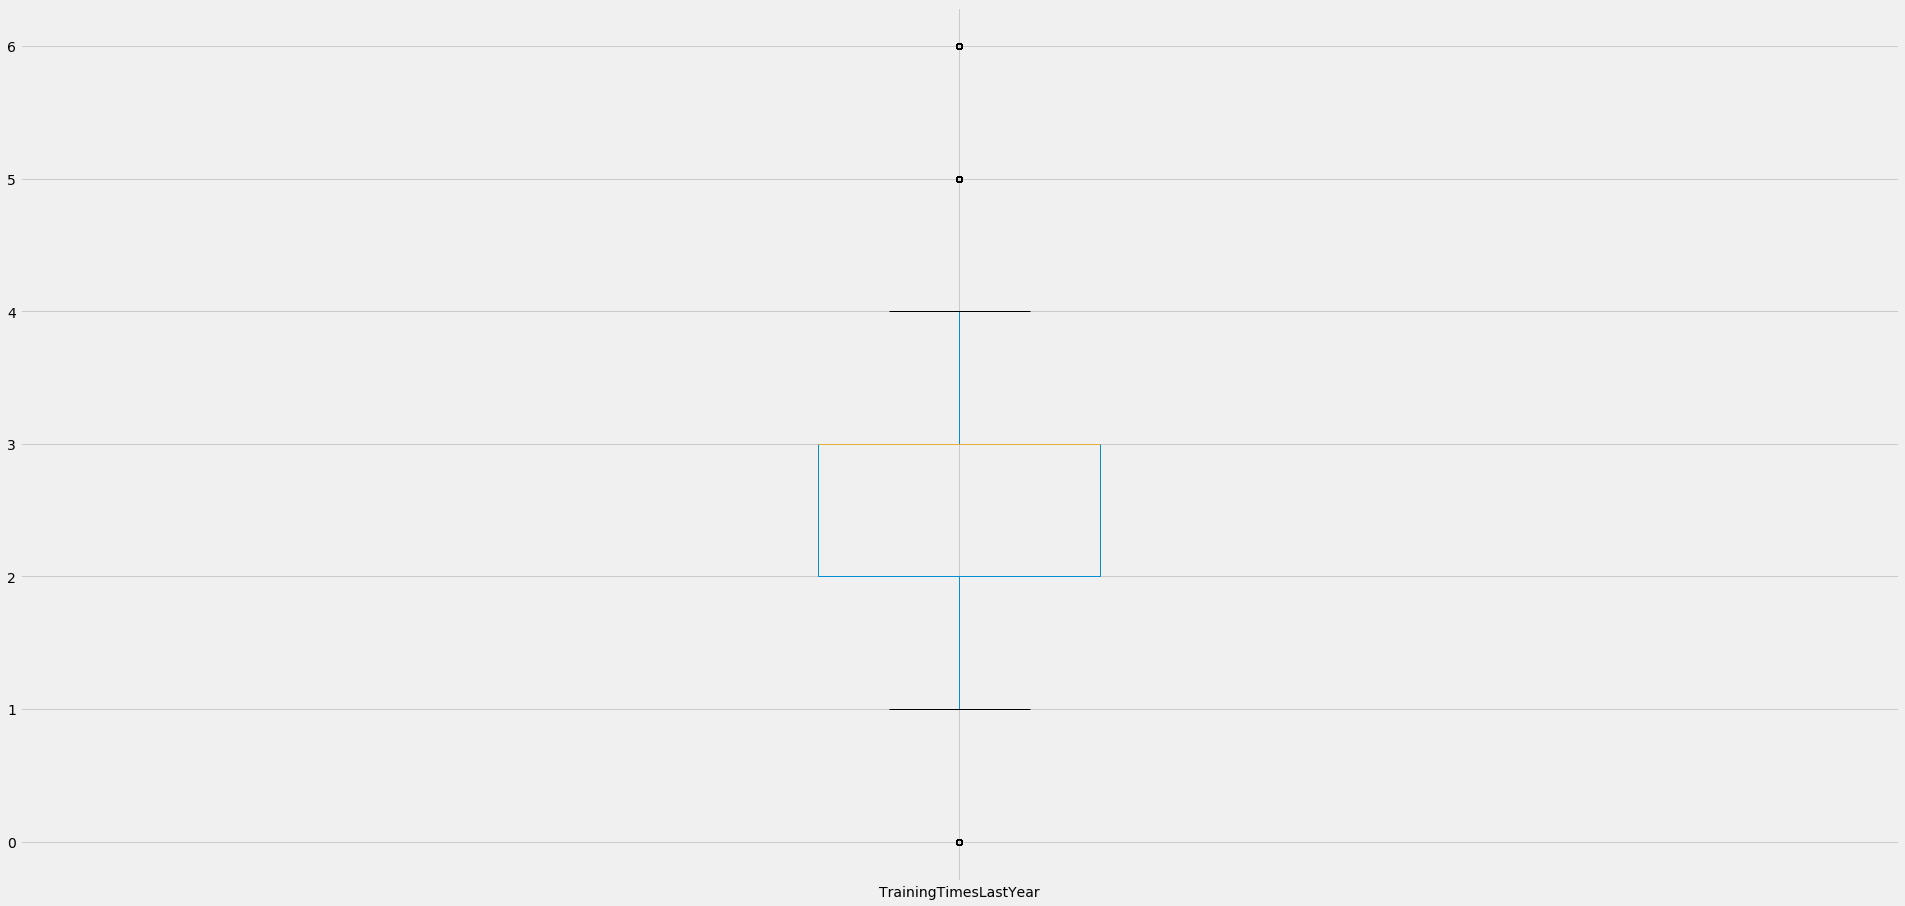

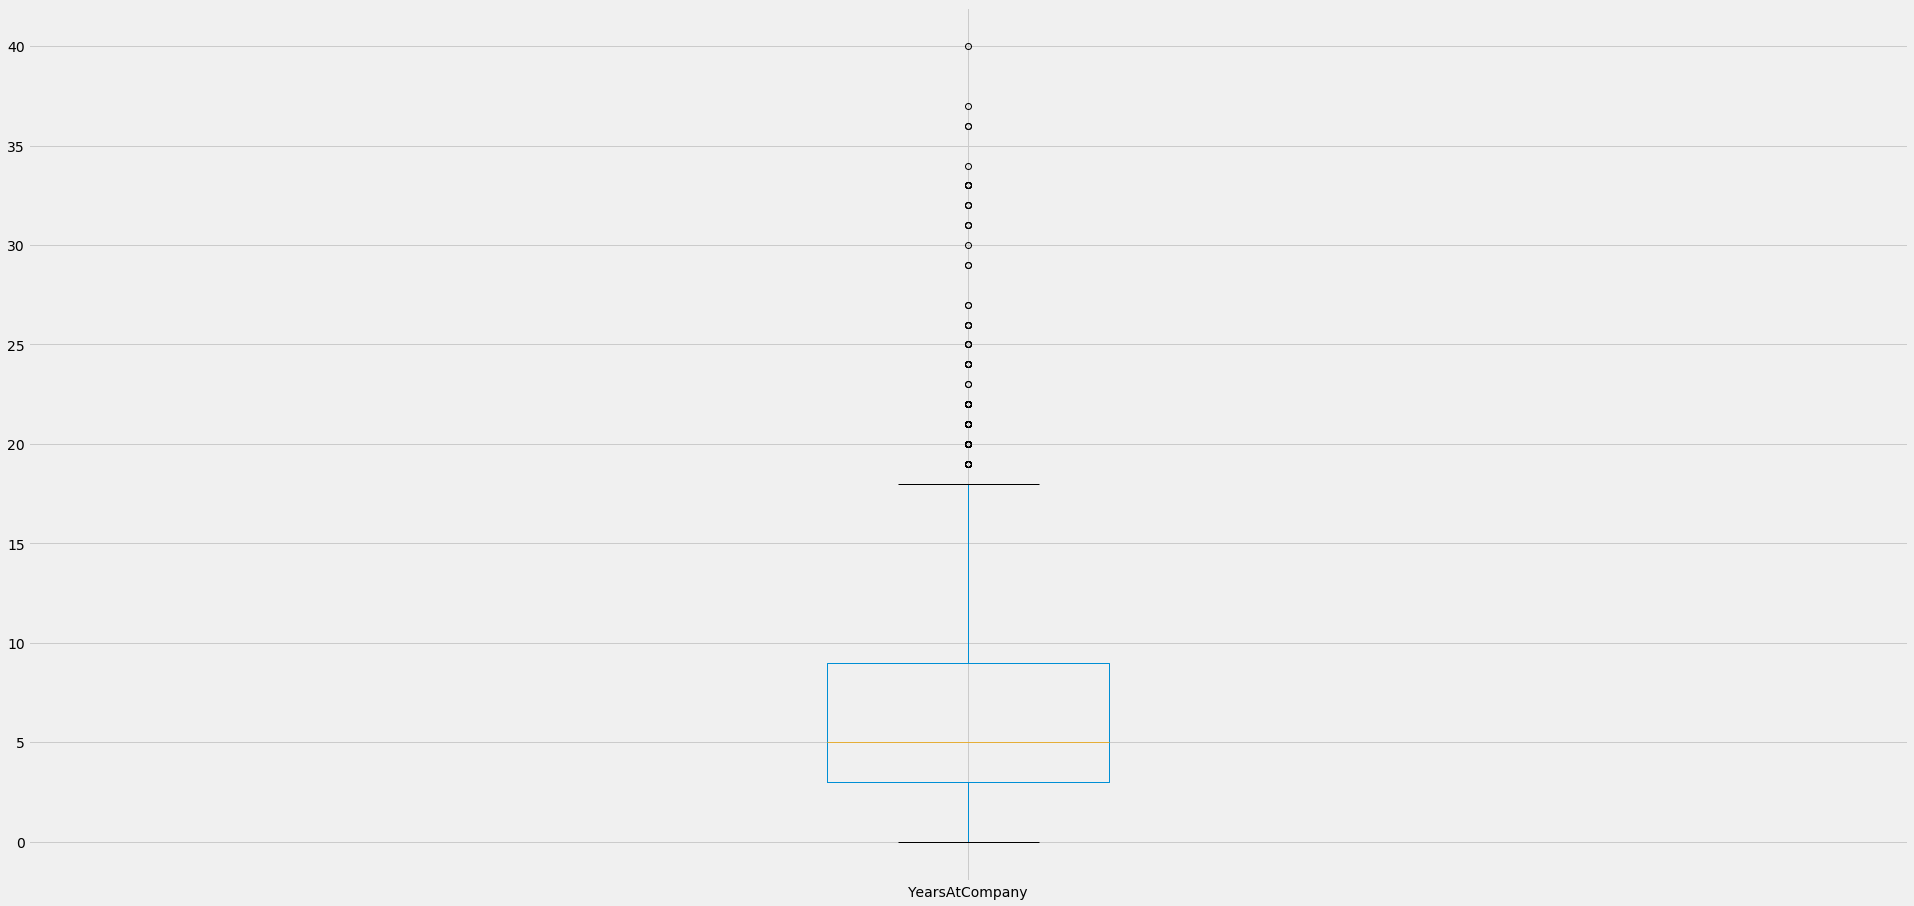

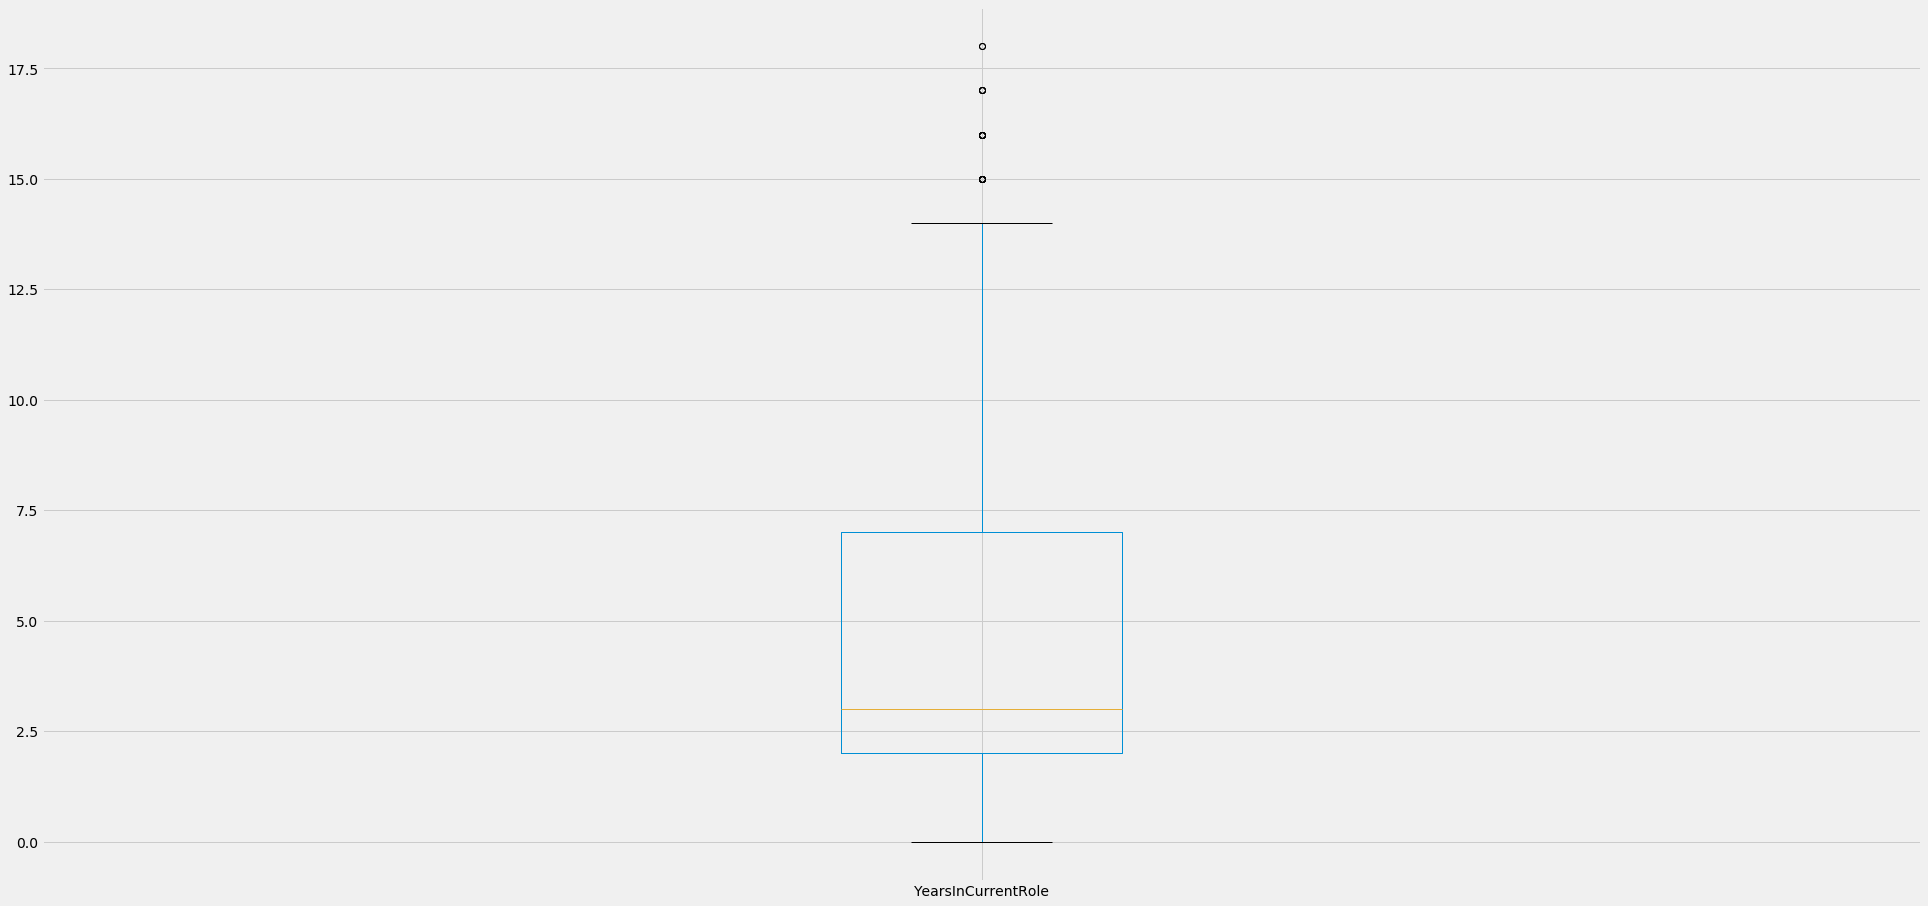

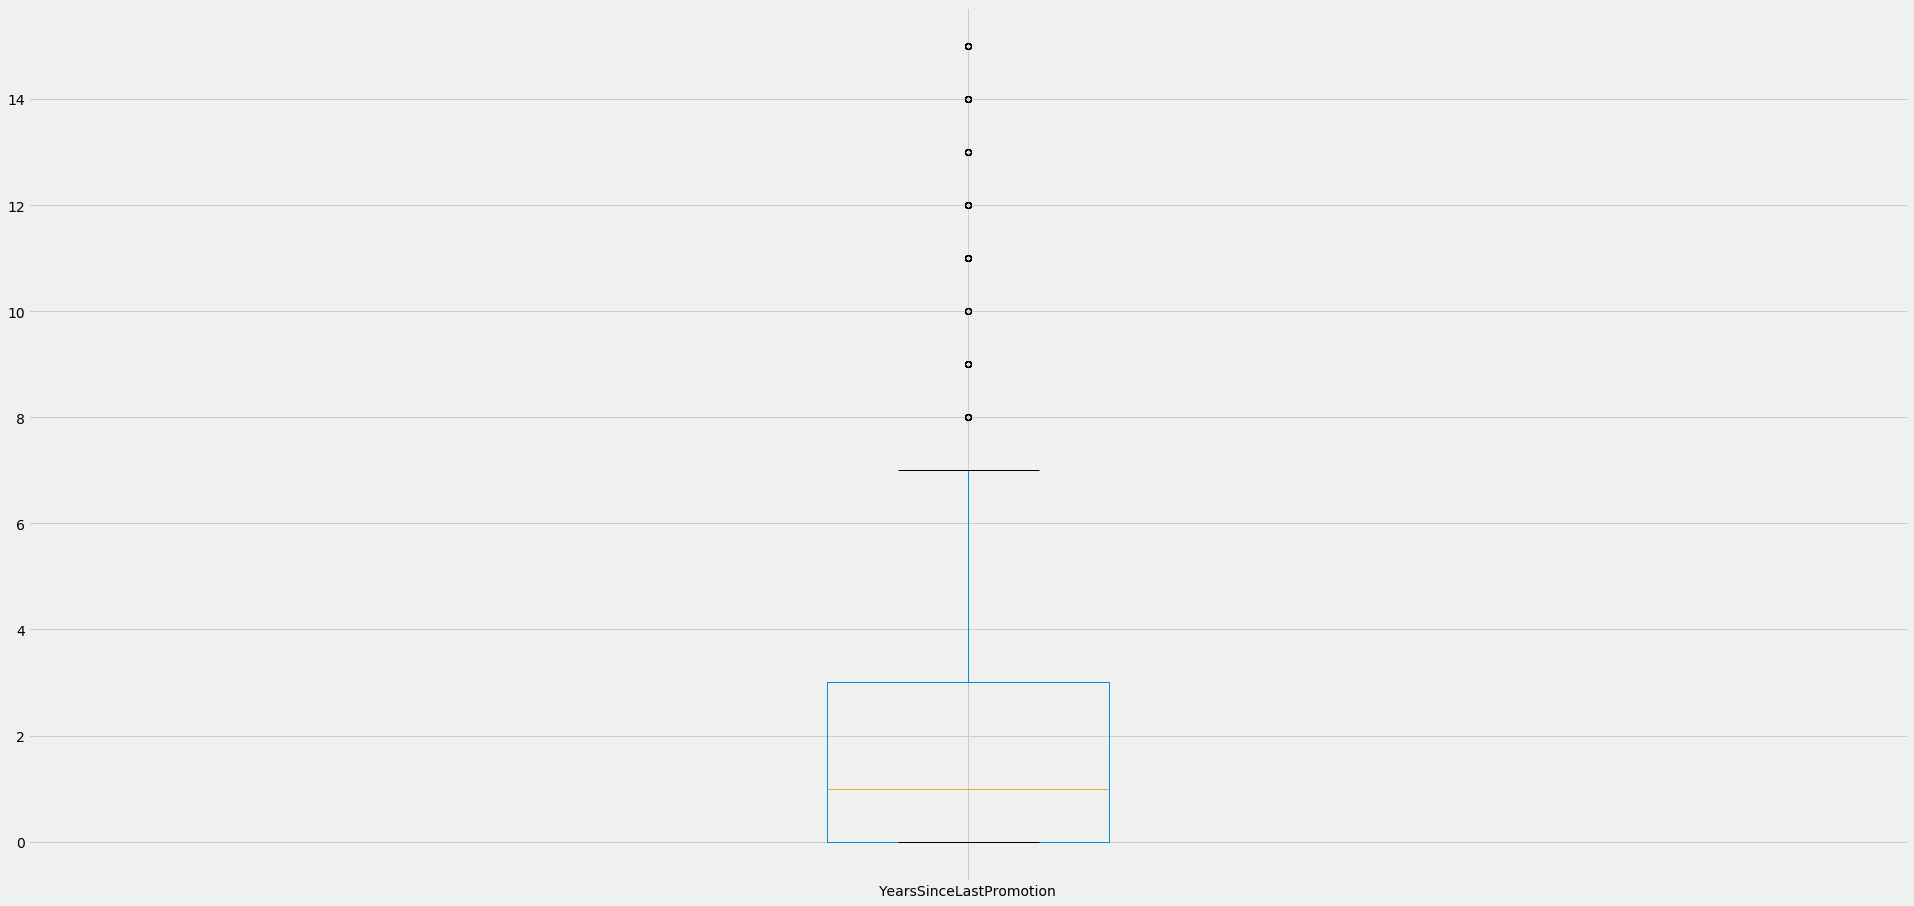

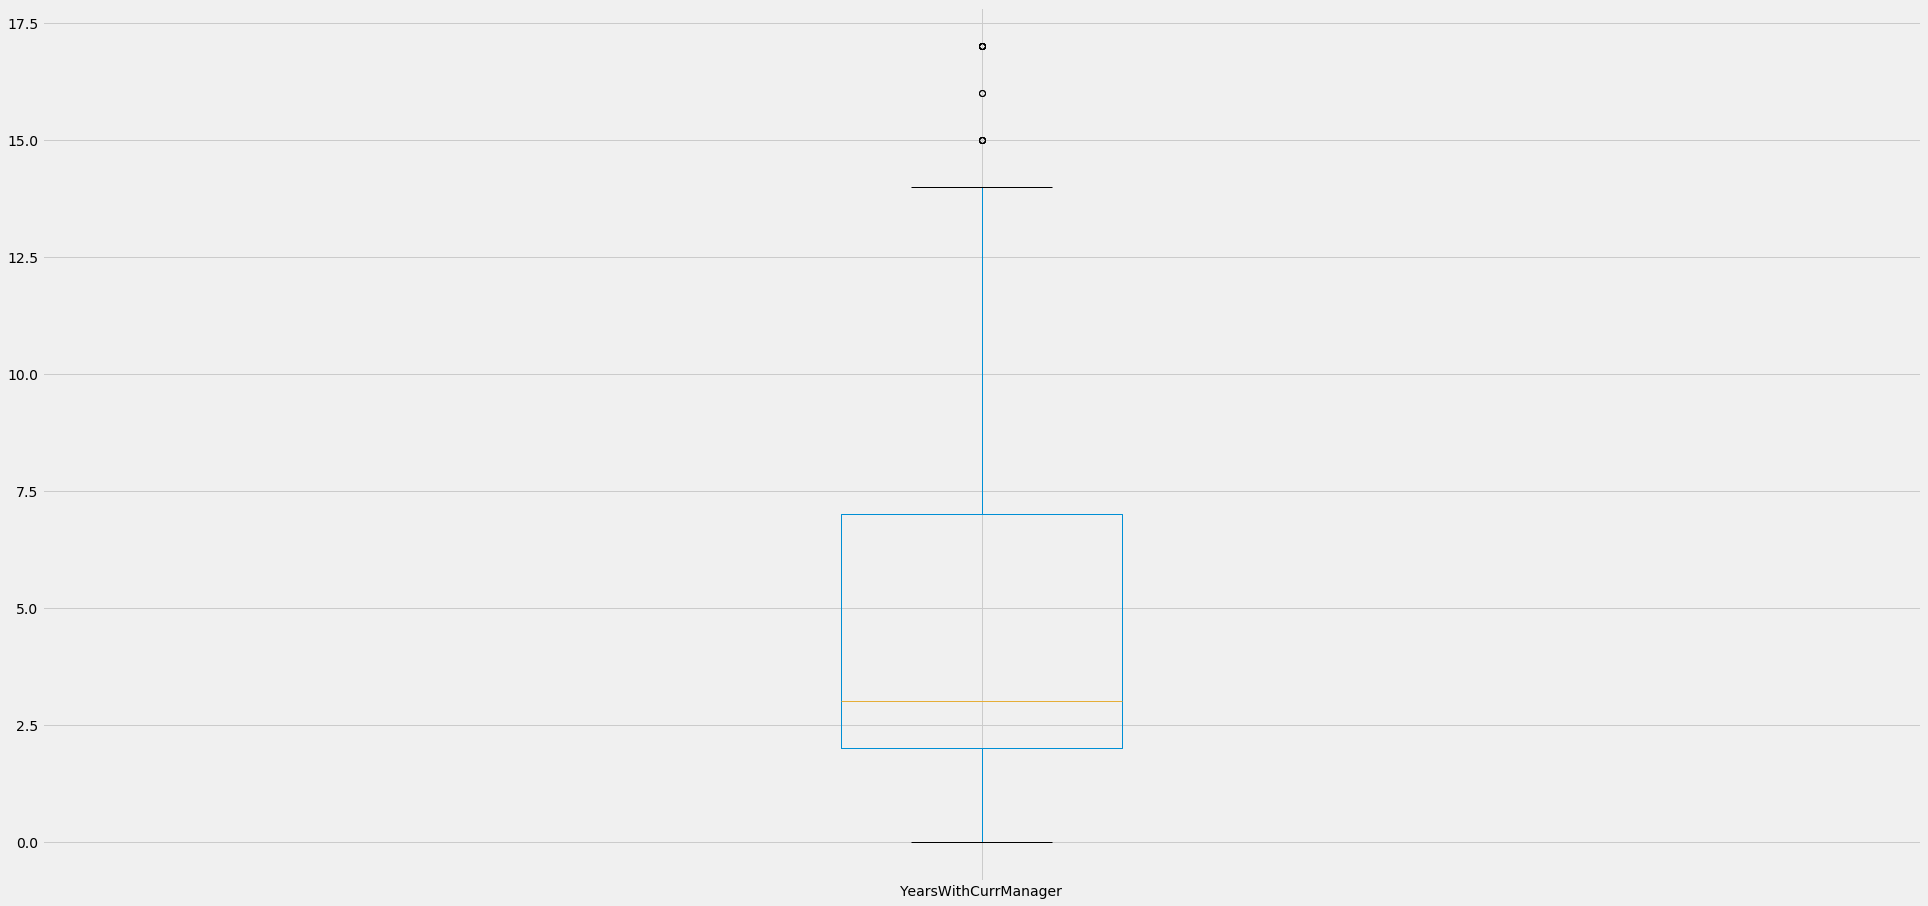

In [16]:
for i in df_num.columns:
    df_num[[i]].boxplot()
    plt.show()

The boxplots seem to confirm many of our observations from our historgrams

Now, let's see what we can learn from a heatmap

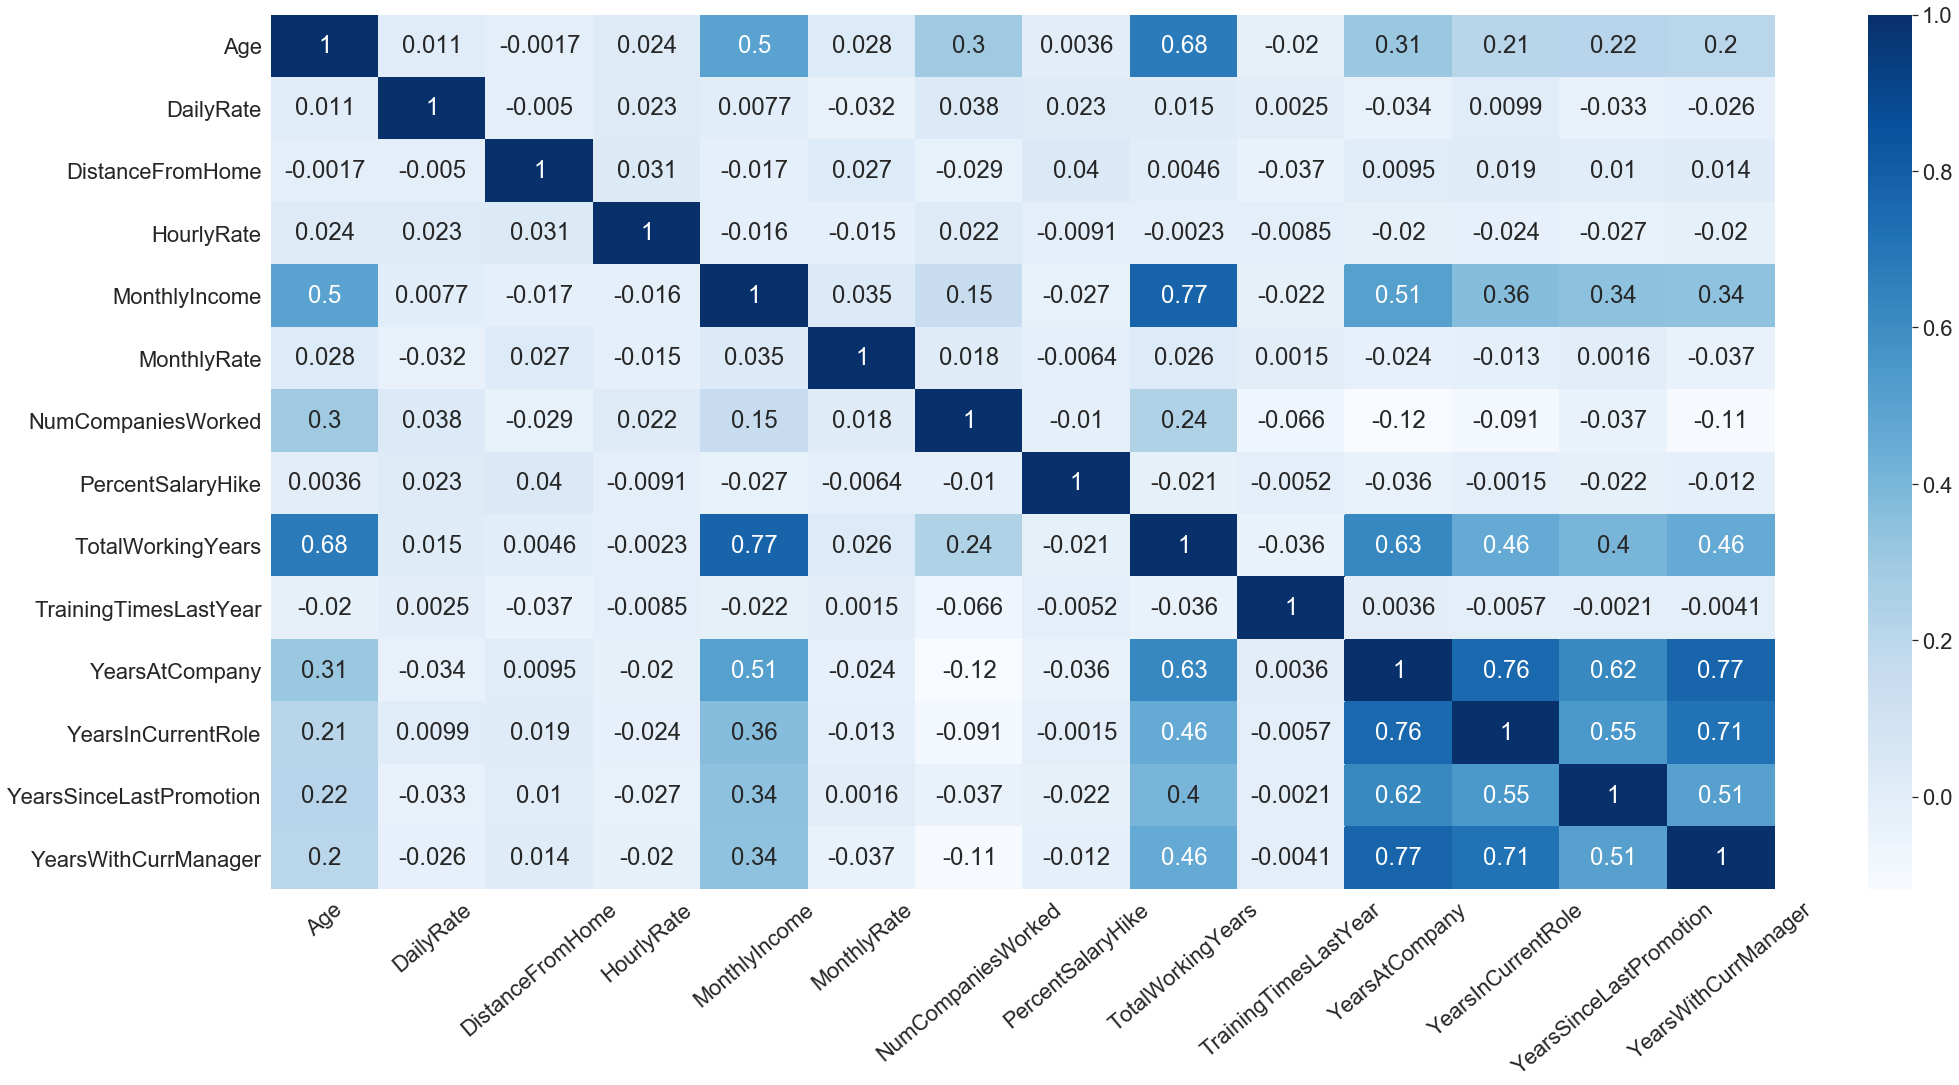

In [17]:
sns.set(font_scale=2)
num_heatmap = sns.heatmap(df_num.corr(), annot=True, cmap='Blues')
num_heatmap.set_xticklabels(num_heatmap.get_yticklabels(), rotation=40)
plt.show()

There are several correlations to note:
Age, monthly income, total working years, 
Years at company, Years in current role, Years since last promotion,
and Years with current manager all seem to have some correlation with each other
Most of this should be expected since as people age, they will gain experience 
which will make them more valuable, but also more specialized so it might 
make it more difficult for them to move out of the role they are in
num of companies worked for doesn't quite fit into this cluster neatly, 
which also should be expected since the longer you work at one company,
the less time you have to work at other companies
Usually the more companies that you work for the higher the salary, so it 
is interesting that there isn't a strong correlation between number of companies worked 
for and monthly income. Especially when years in current role and company and
since last promotion and with current manager are so low... this indicates
that this company strongly rewards loyalty. So a follow on question is
whether or not they reward loyatly at the cost of productivity

Since there are so many correlations it will be important to factor them
into the regression analysis because it can make the coefficients of a 
regression model unstable
    
https://blog.exploratory.io/why-multicollinearity-is-bad-and-how-to-detect-it-in-your-regression-models-e40d782e67e
So to correct for these multicolinearity we will drop a few columns
We will drop all of the aforementioned columns and add each one once when we test regressions

Now let's create a df for the categorial variables. This will also include ordinal values such as ratings from 0-5

In [18]:
df_cat = df[['Attrition',
             'BusinessTravel',
             'Department',
             'Education',
             'EducationField',
             'EnvironmentSatisfaction',
             'JobInvolvement',
             'JobLevel',
             'JobRole',
             'JobSatisfaction',
             'MaritalStatus',
             'OverTime',
             'PerformanceRating',
             'RelationshipSatisfaction',
             ]]

check for correlations

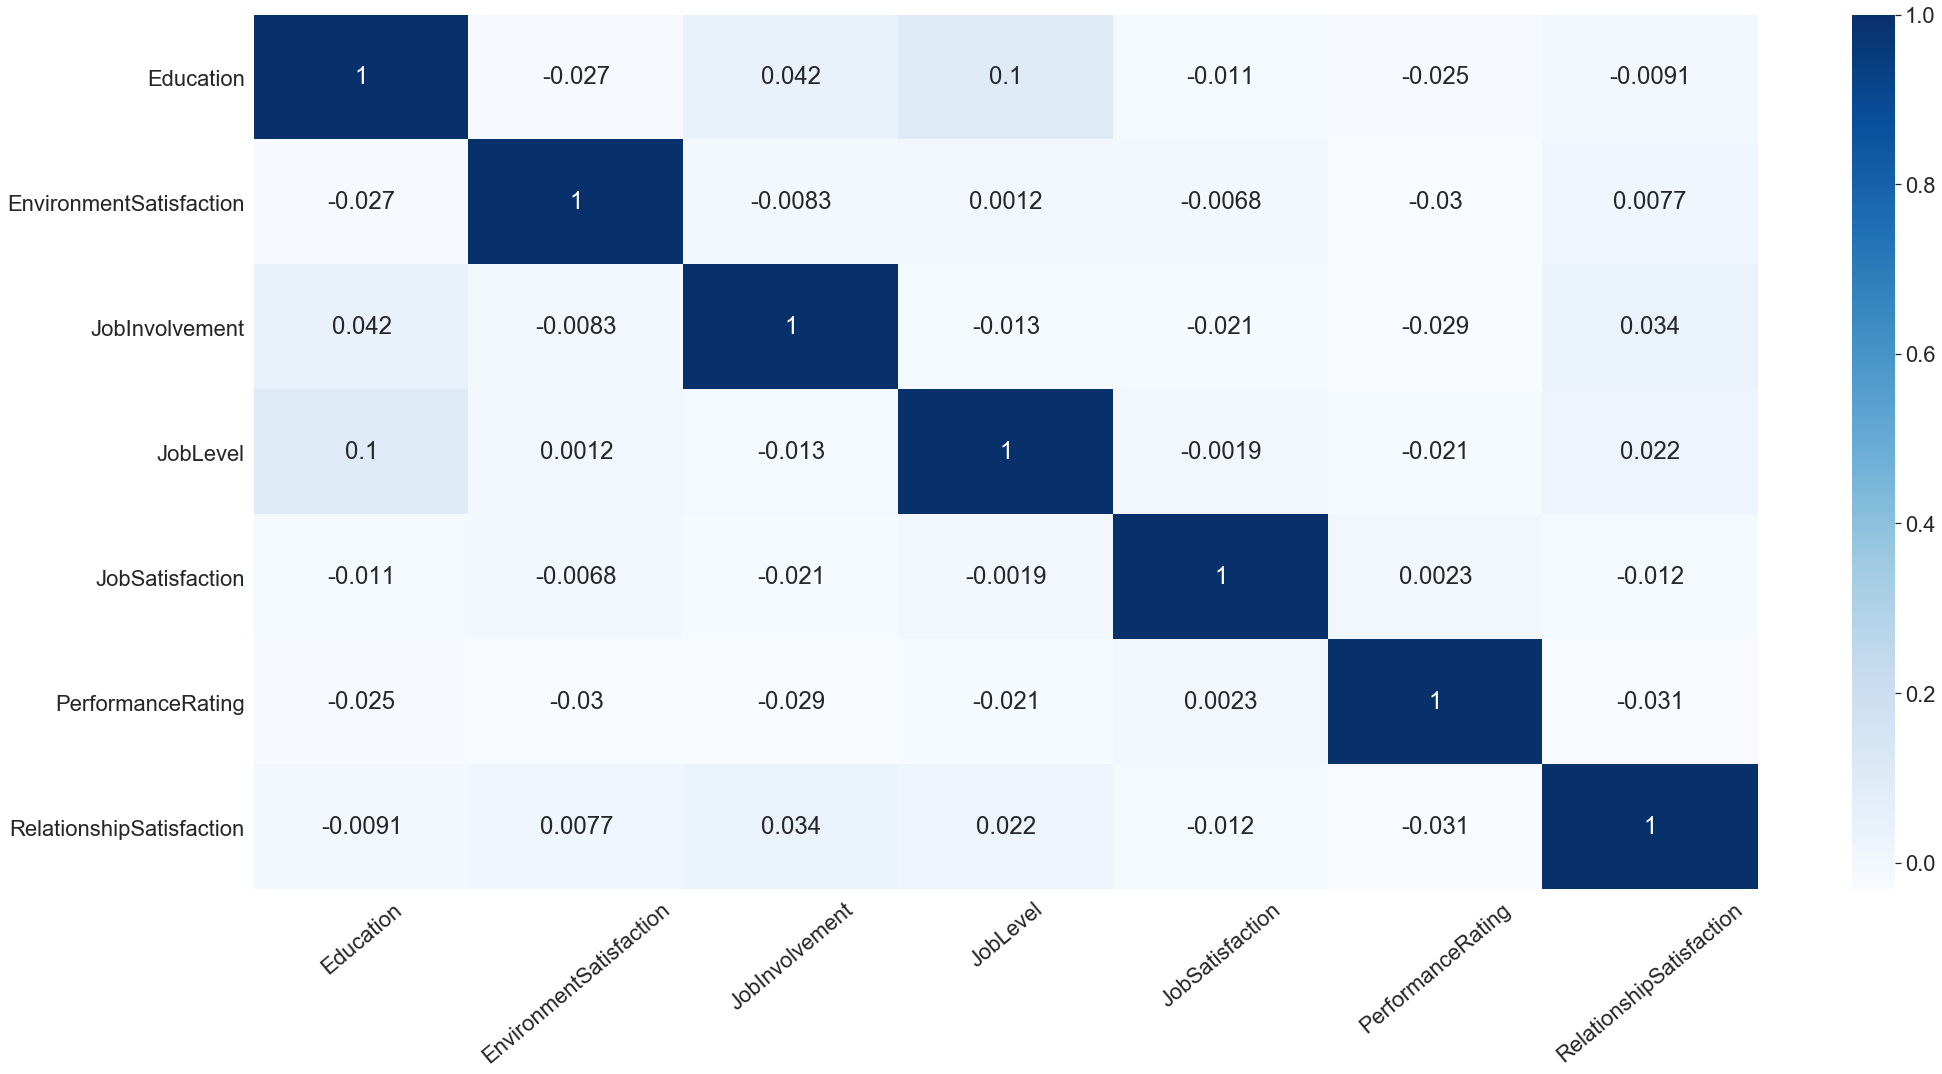

In [19]:
sns.set(font_scale=2)
num_heatmap = sns.heatmap(df_cat.corr(), annot=True, cmap='Blues')
num_heatmap.set_xticklabels(num_heatmap.get_yticklabels(), rotation=40)
plt.show()

Here we have few correlations than before. The strongest being Education and
Job level which makes sense

check for barplot

graph for Attrition: total = 2


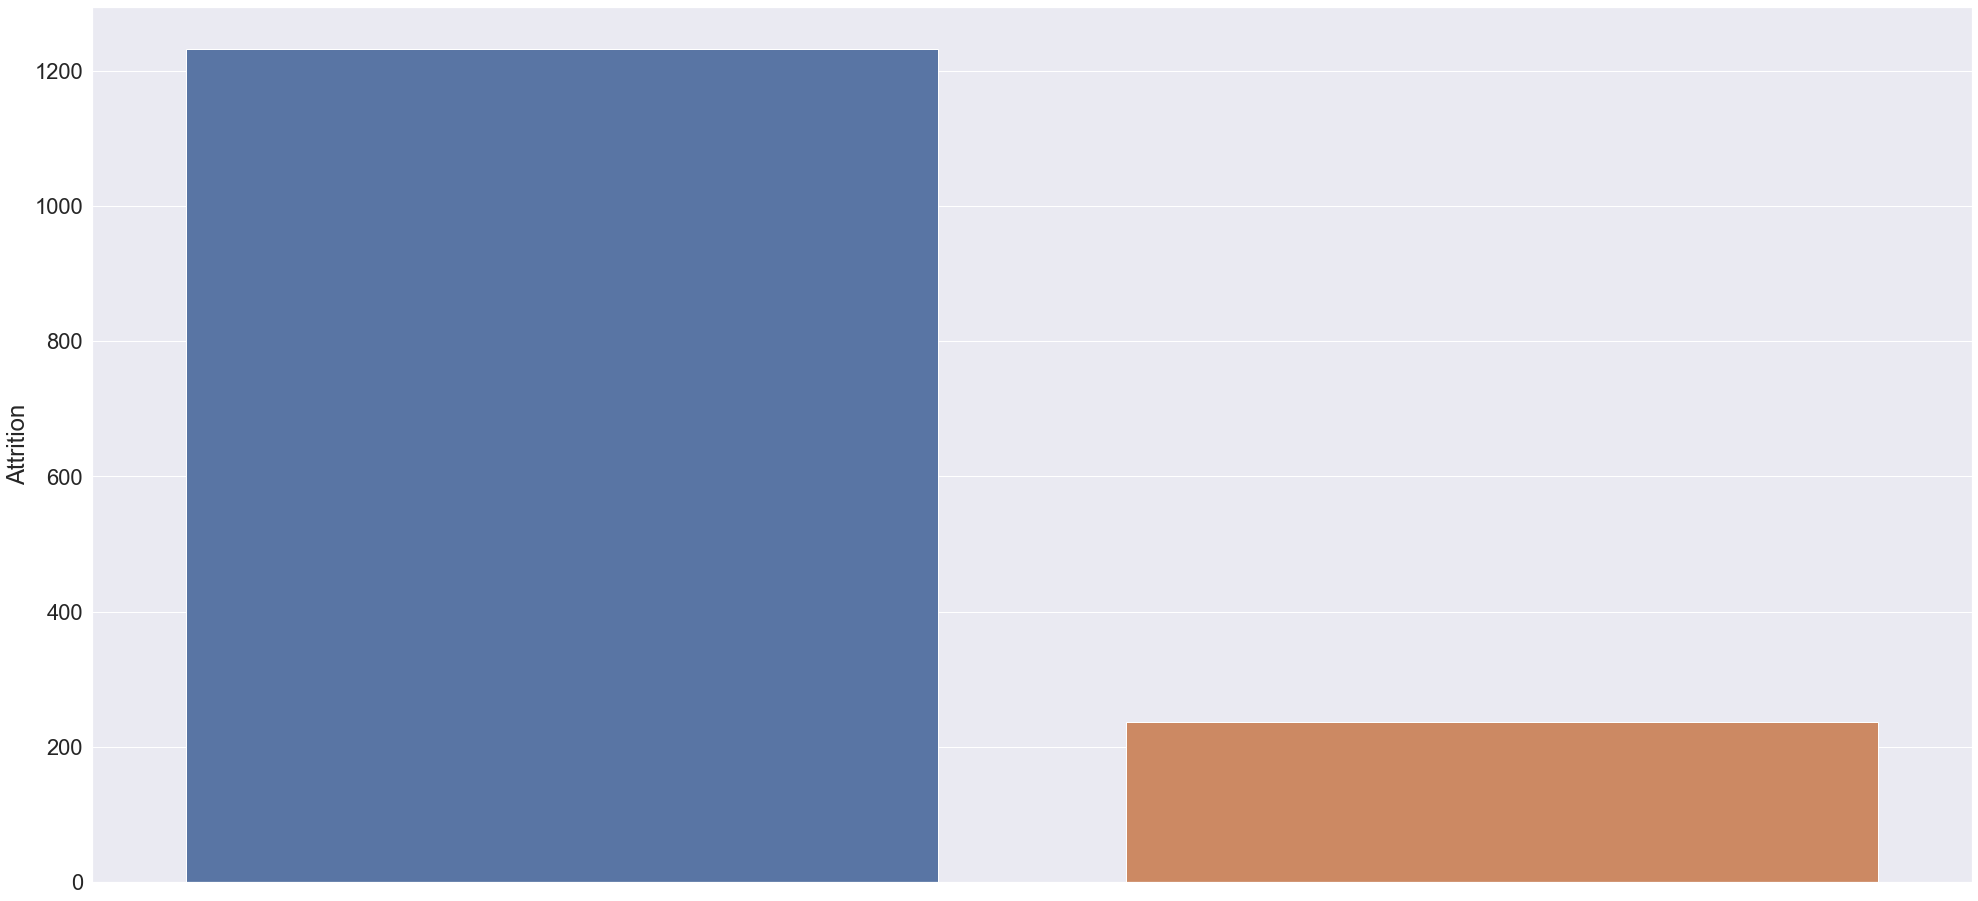

graph for BusinessTravel: total = 3


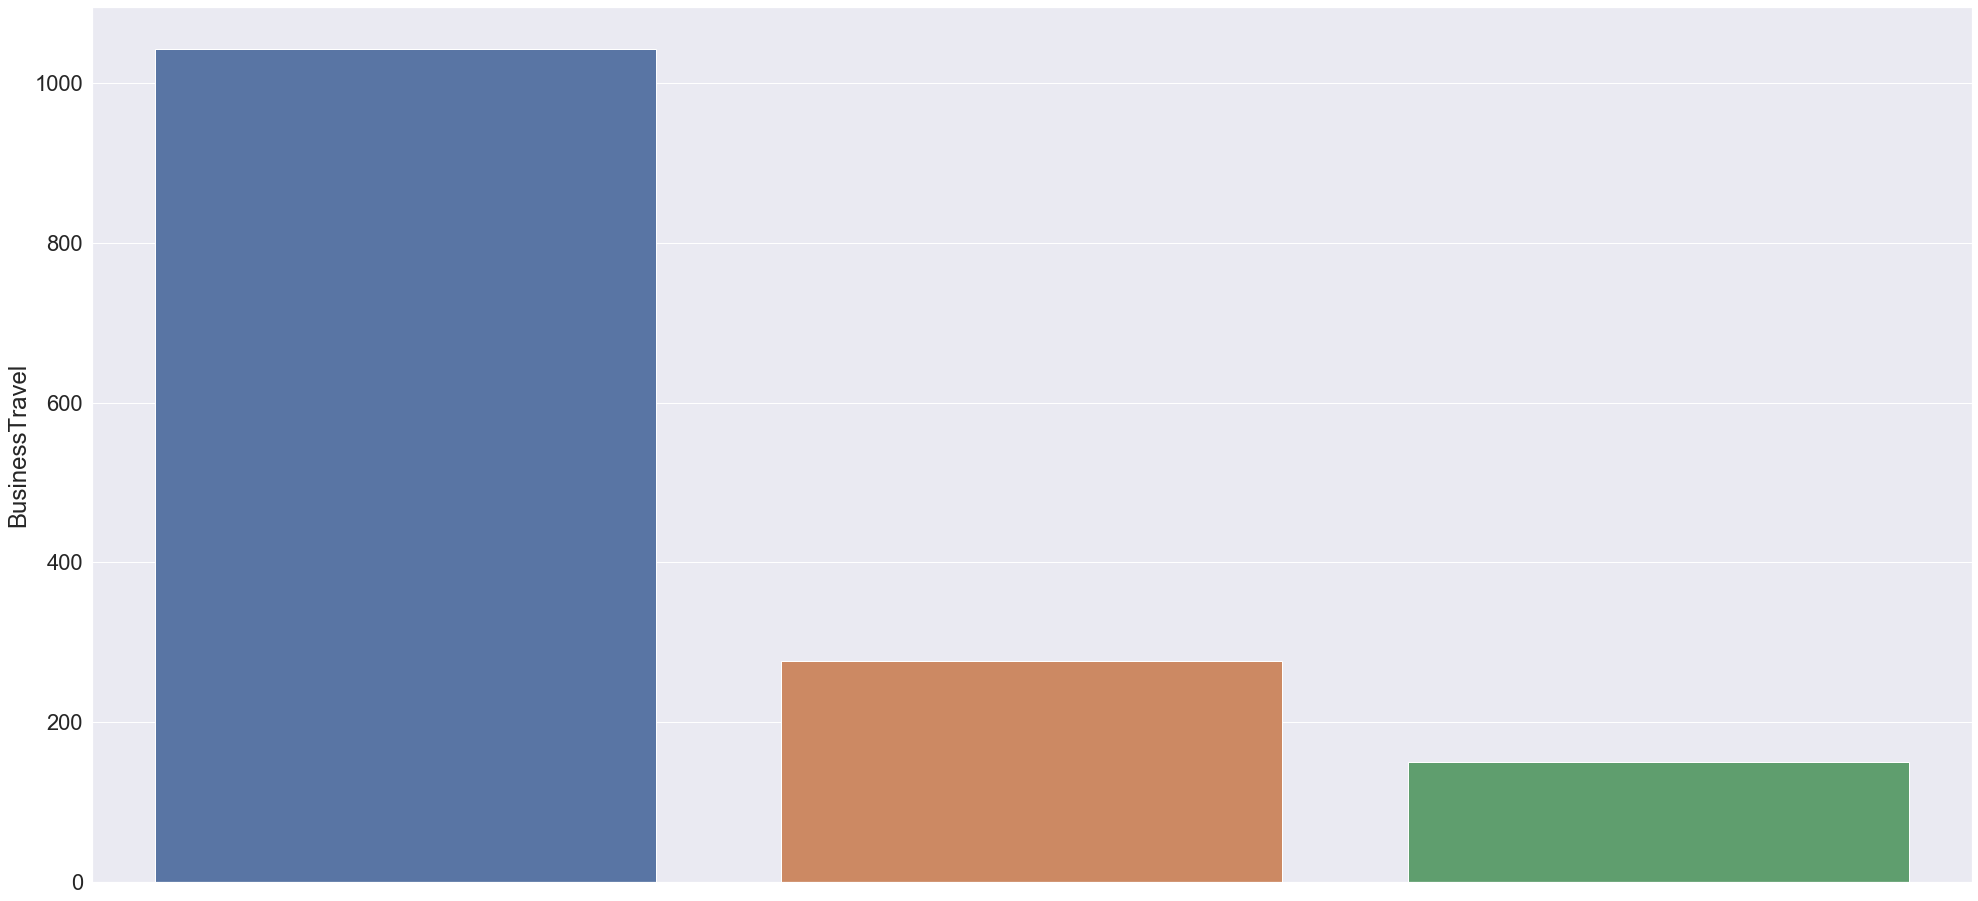

graph for Department: total = 3


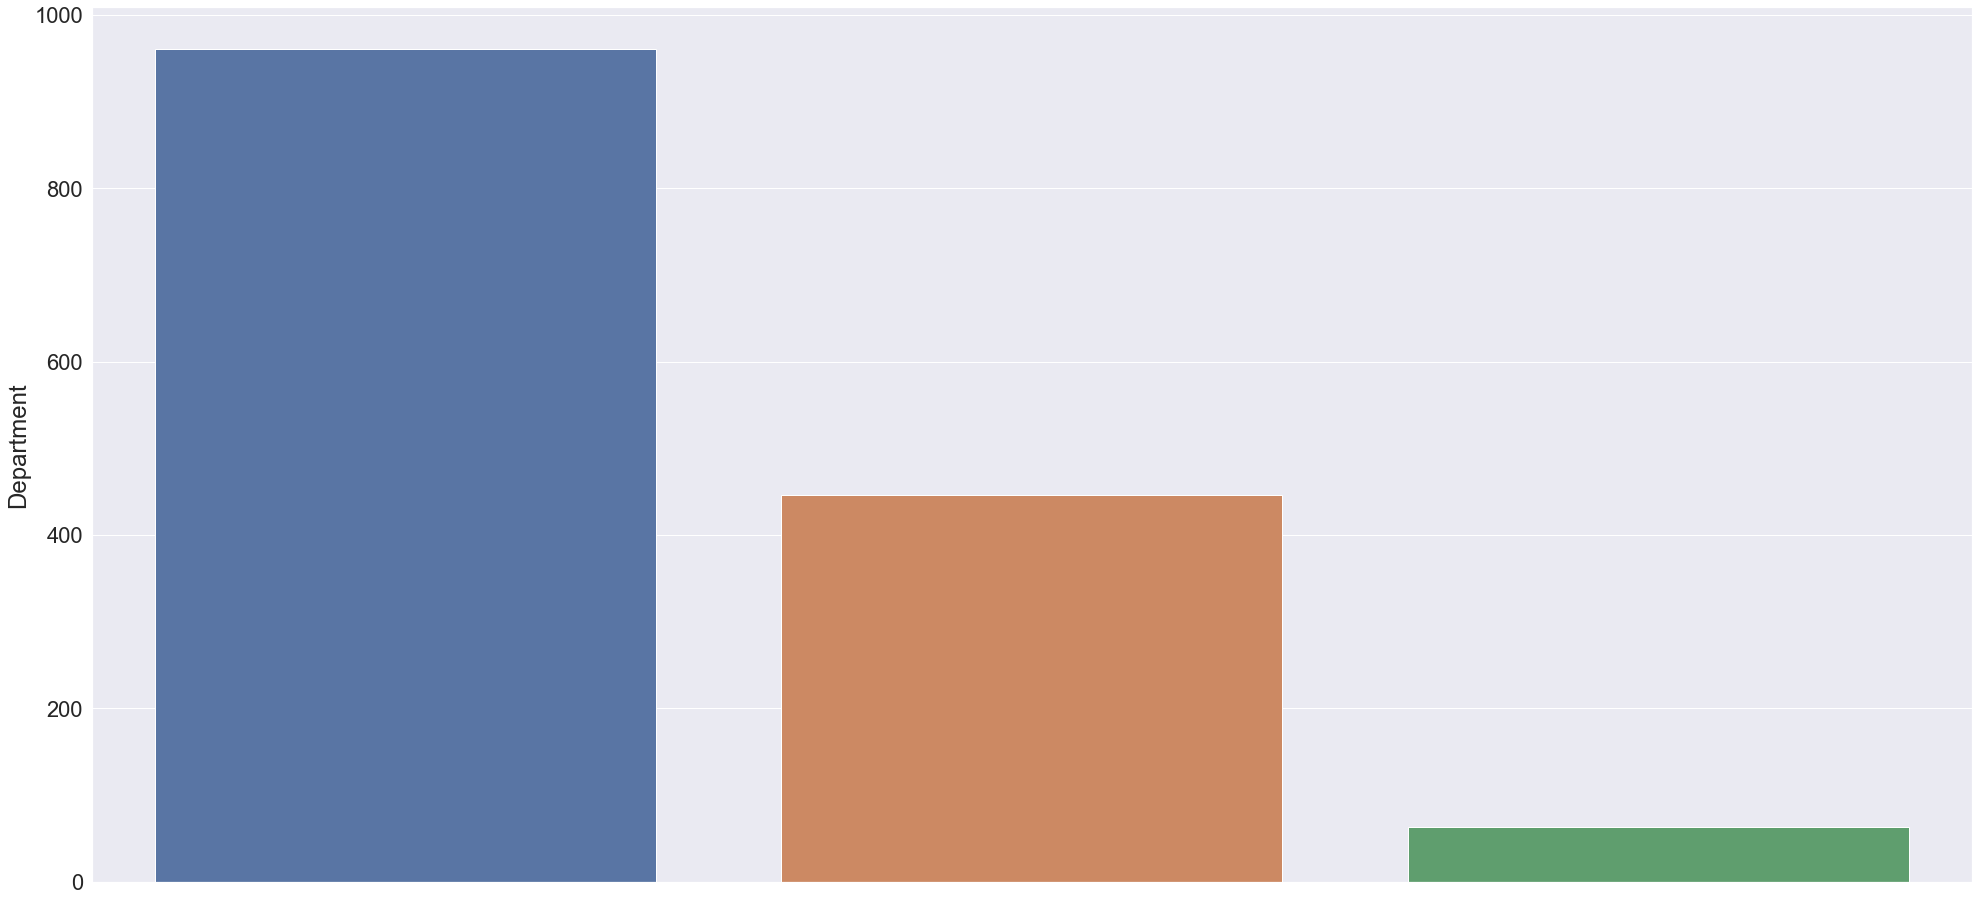

graph for Education: total = 5


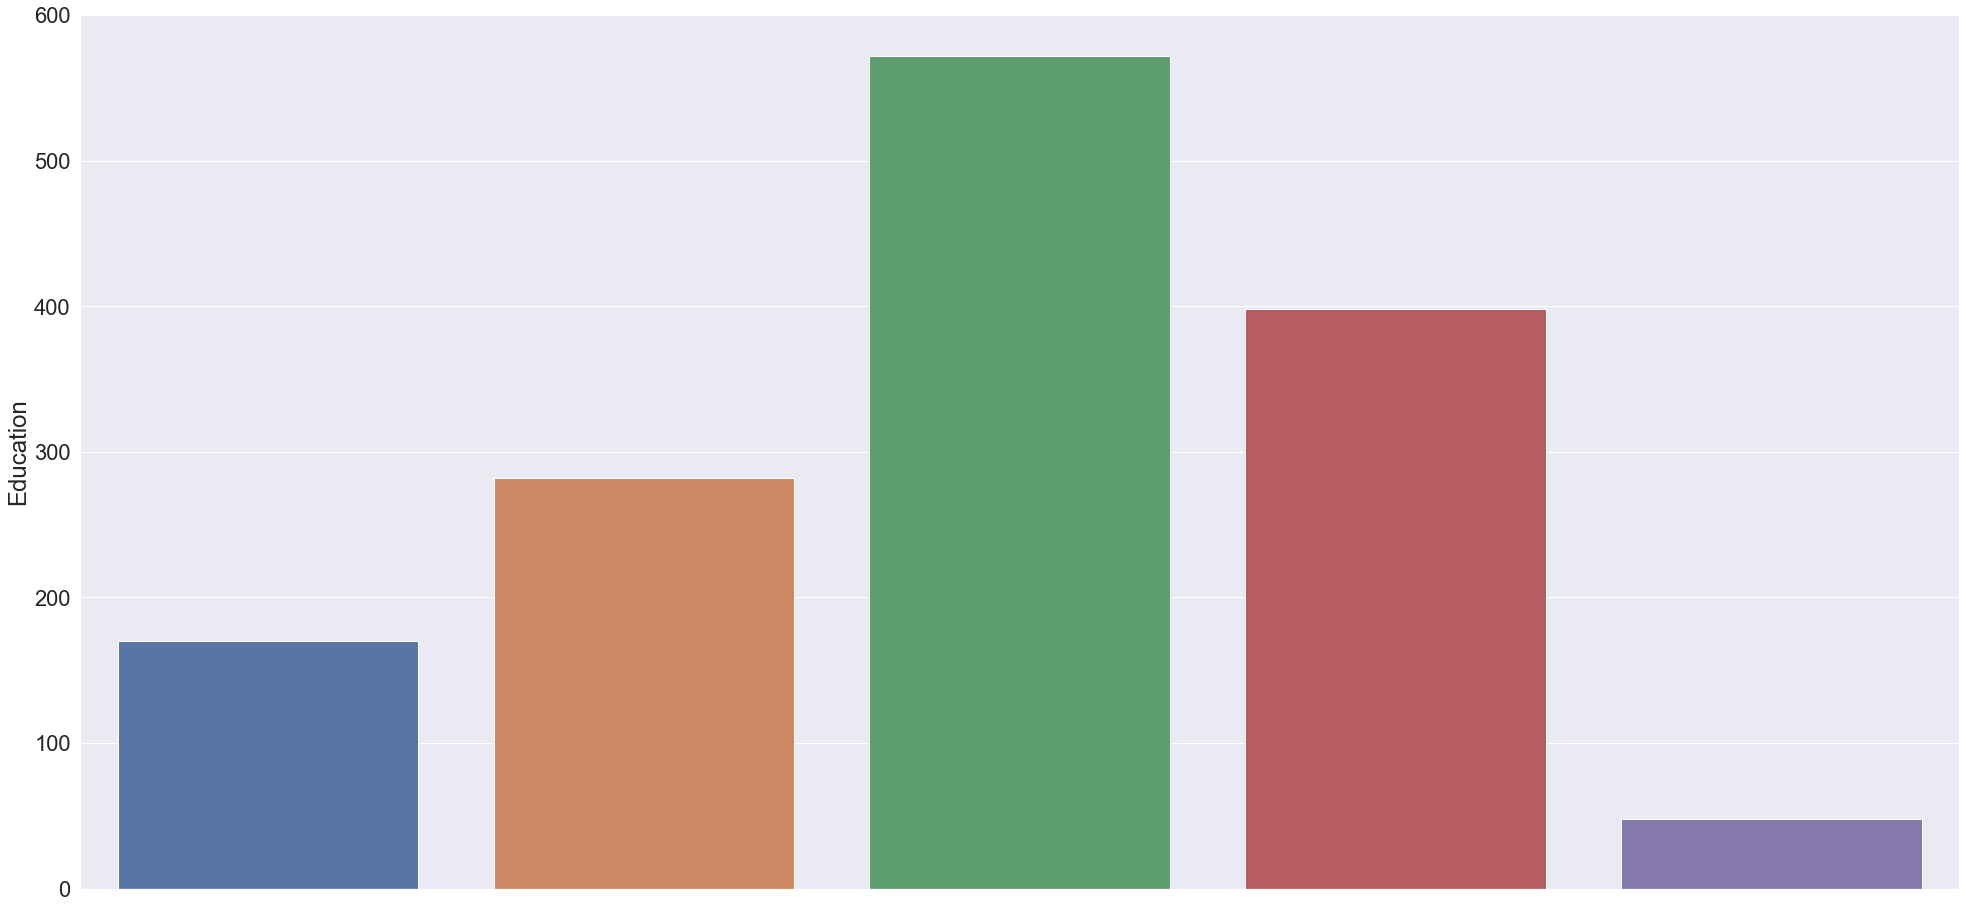

graph for EducationField: total = 6


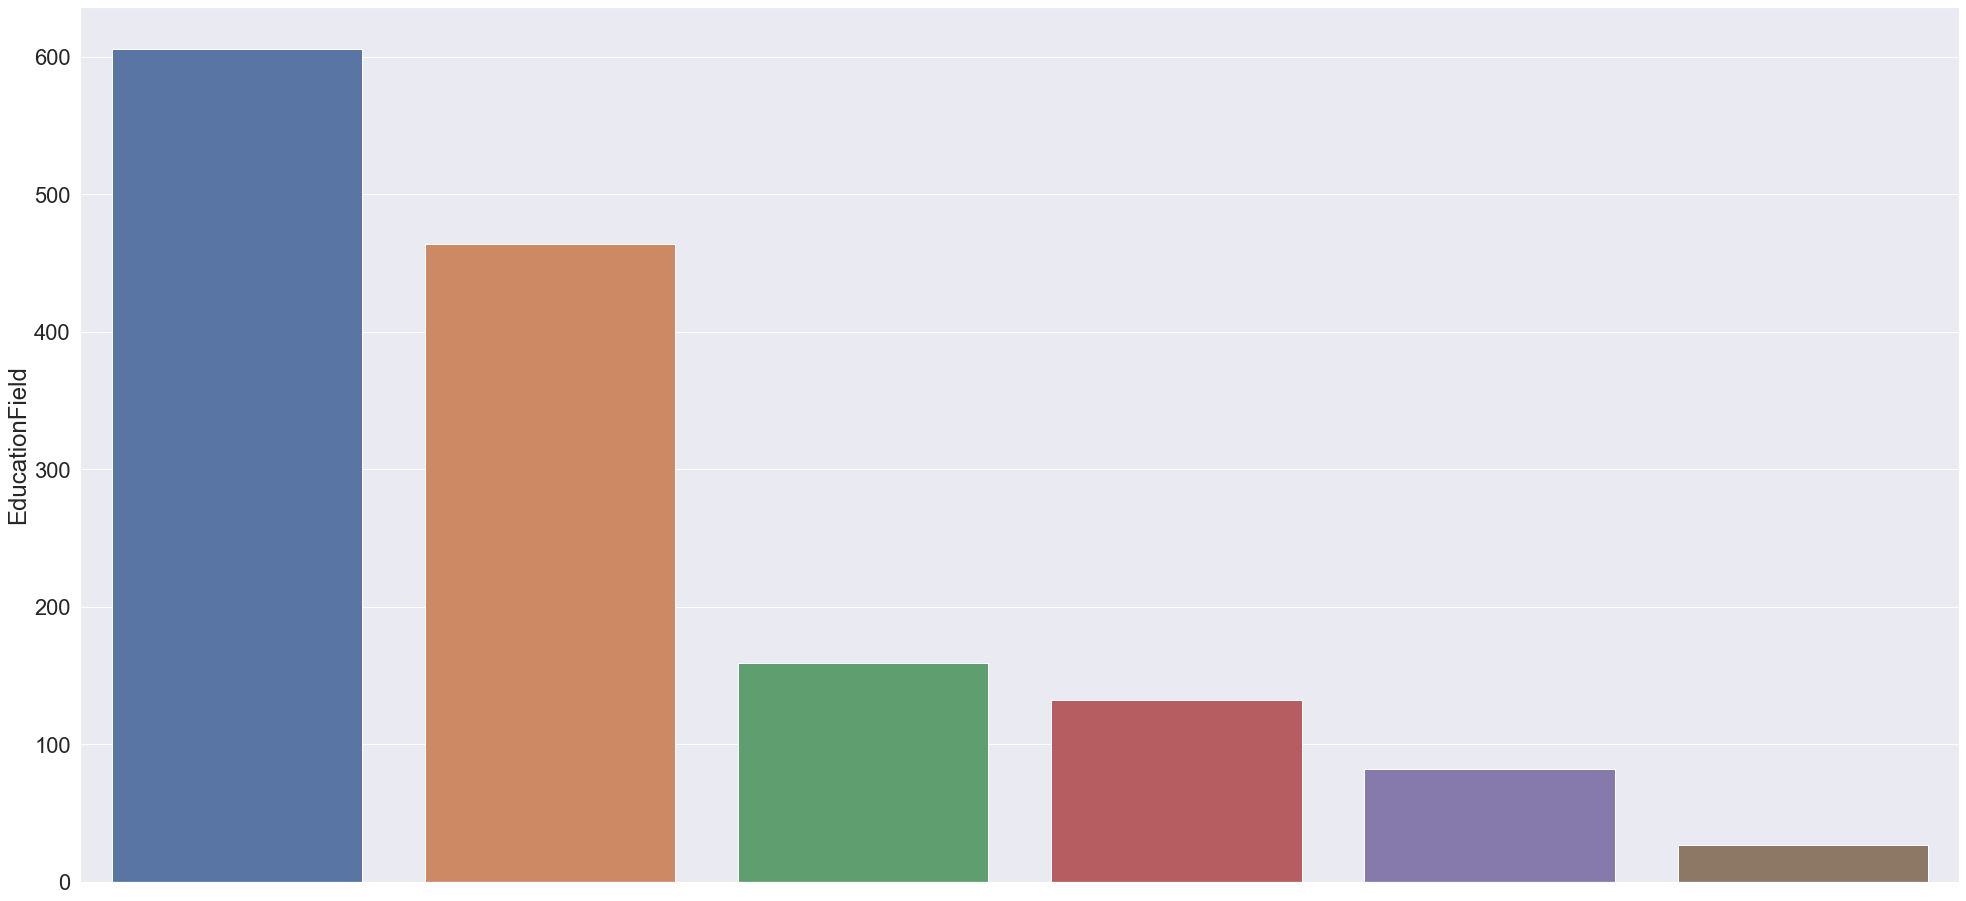

graph for EnvironmentSatisfaction: total = 4


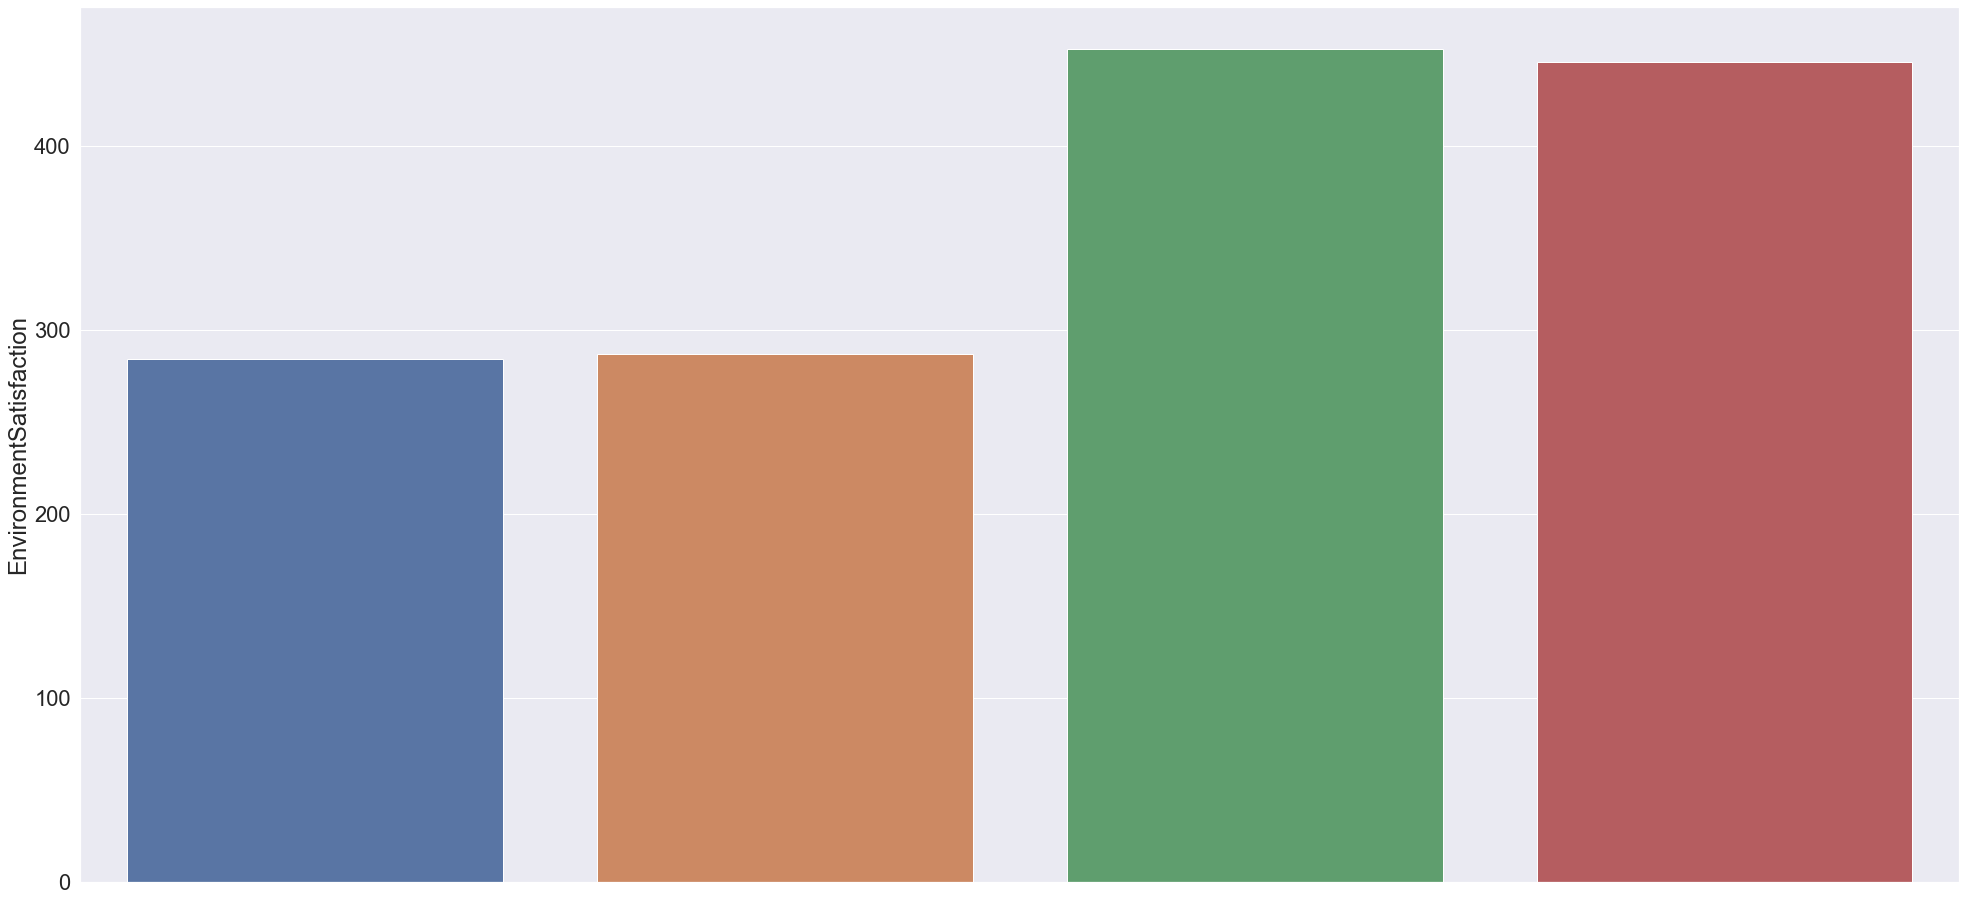

graph for JobInvolvement: total = 4


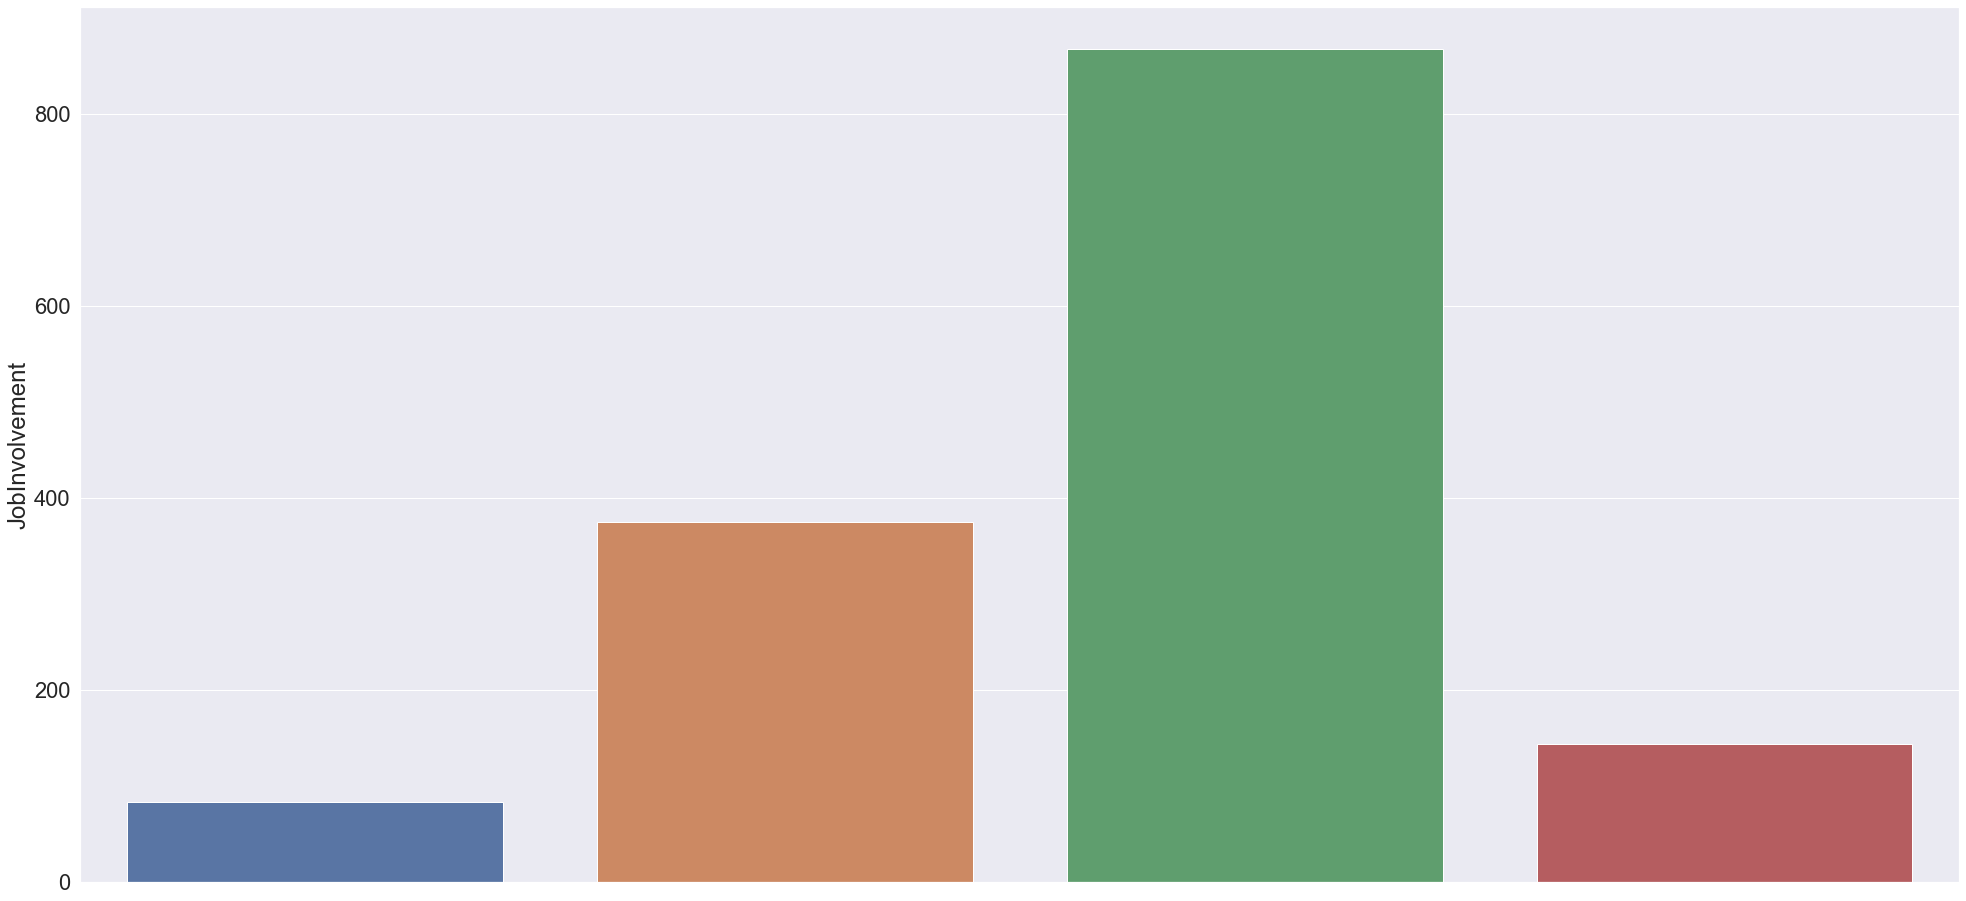

graph for JobLevel: total = 5


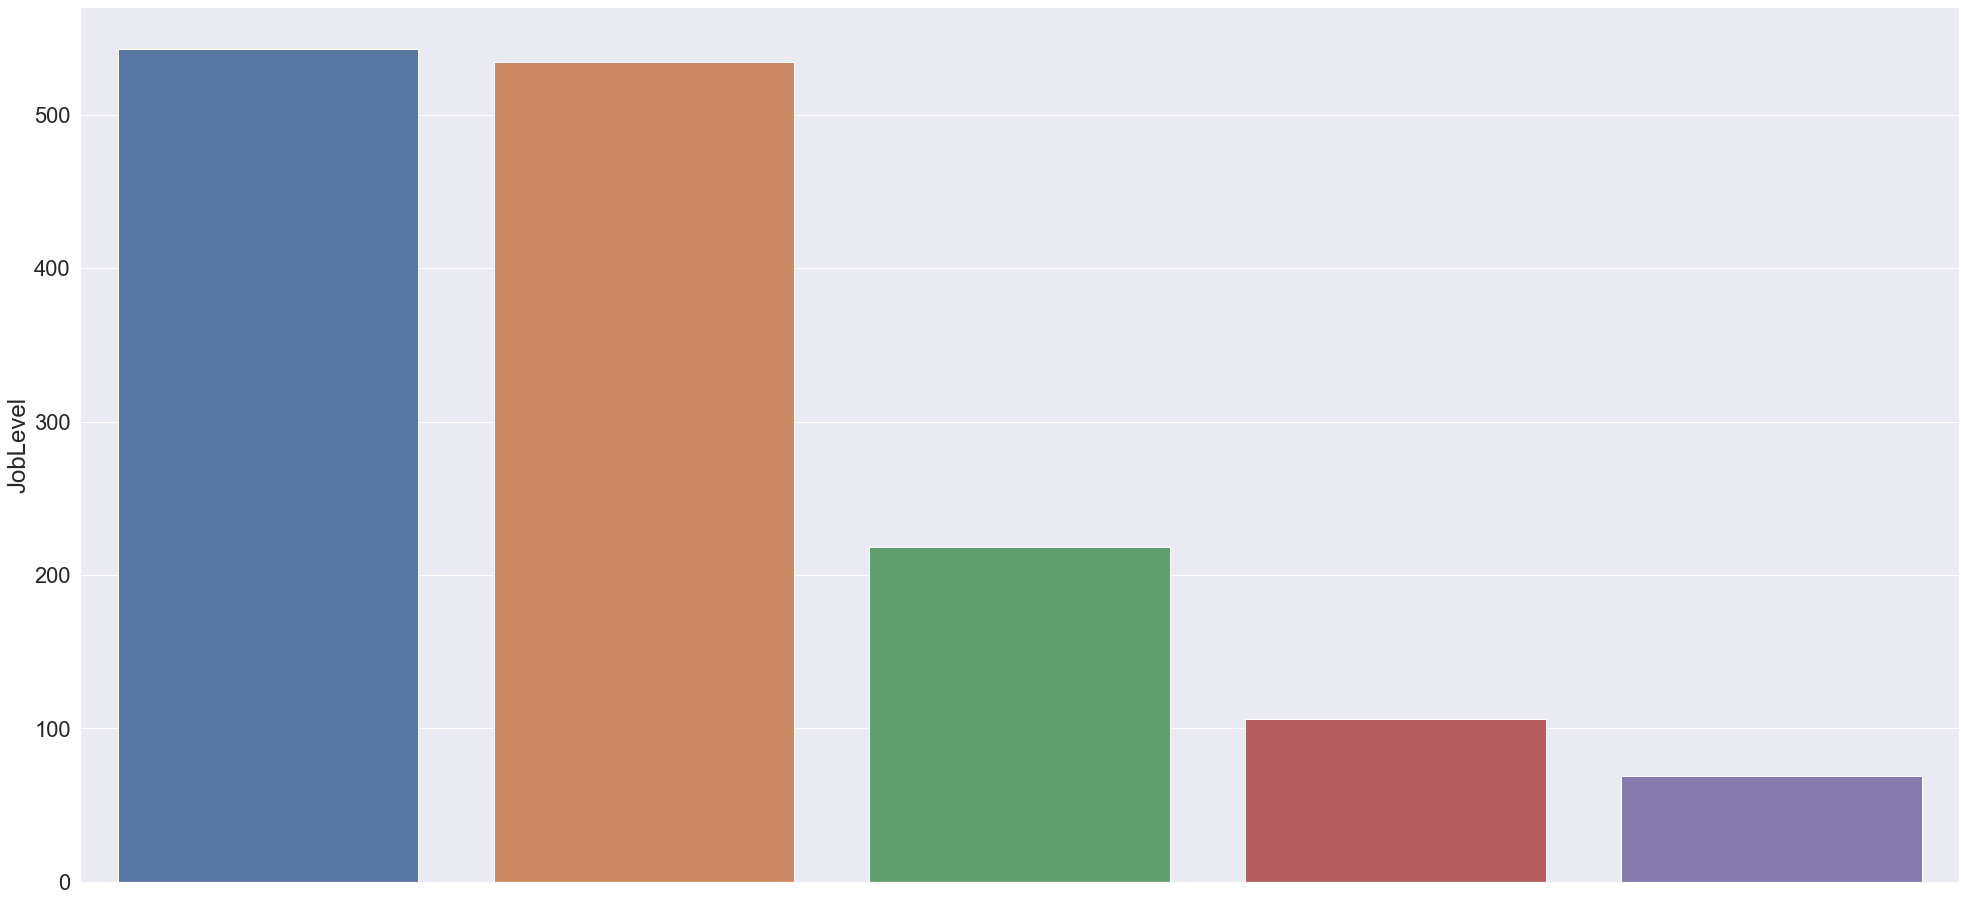

graph for JobRole: total = 9


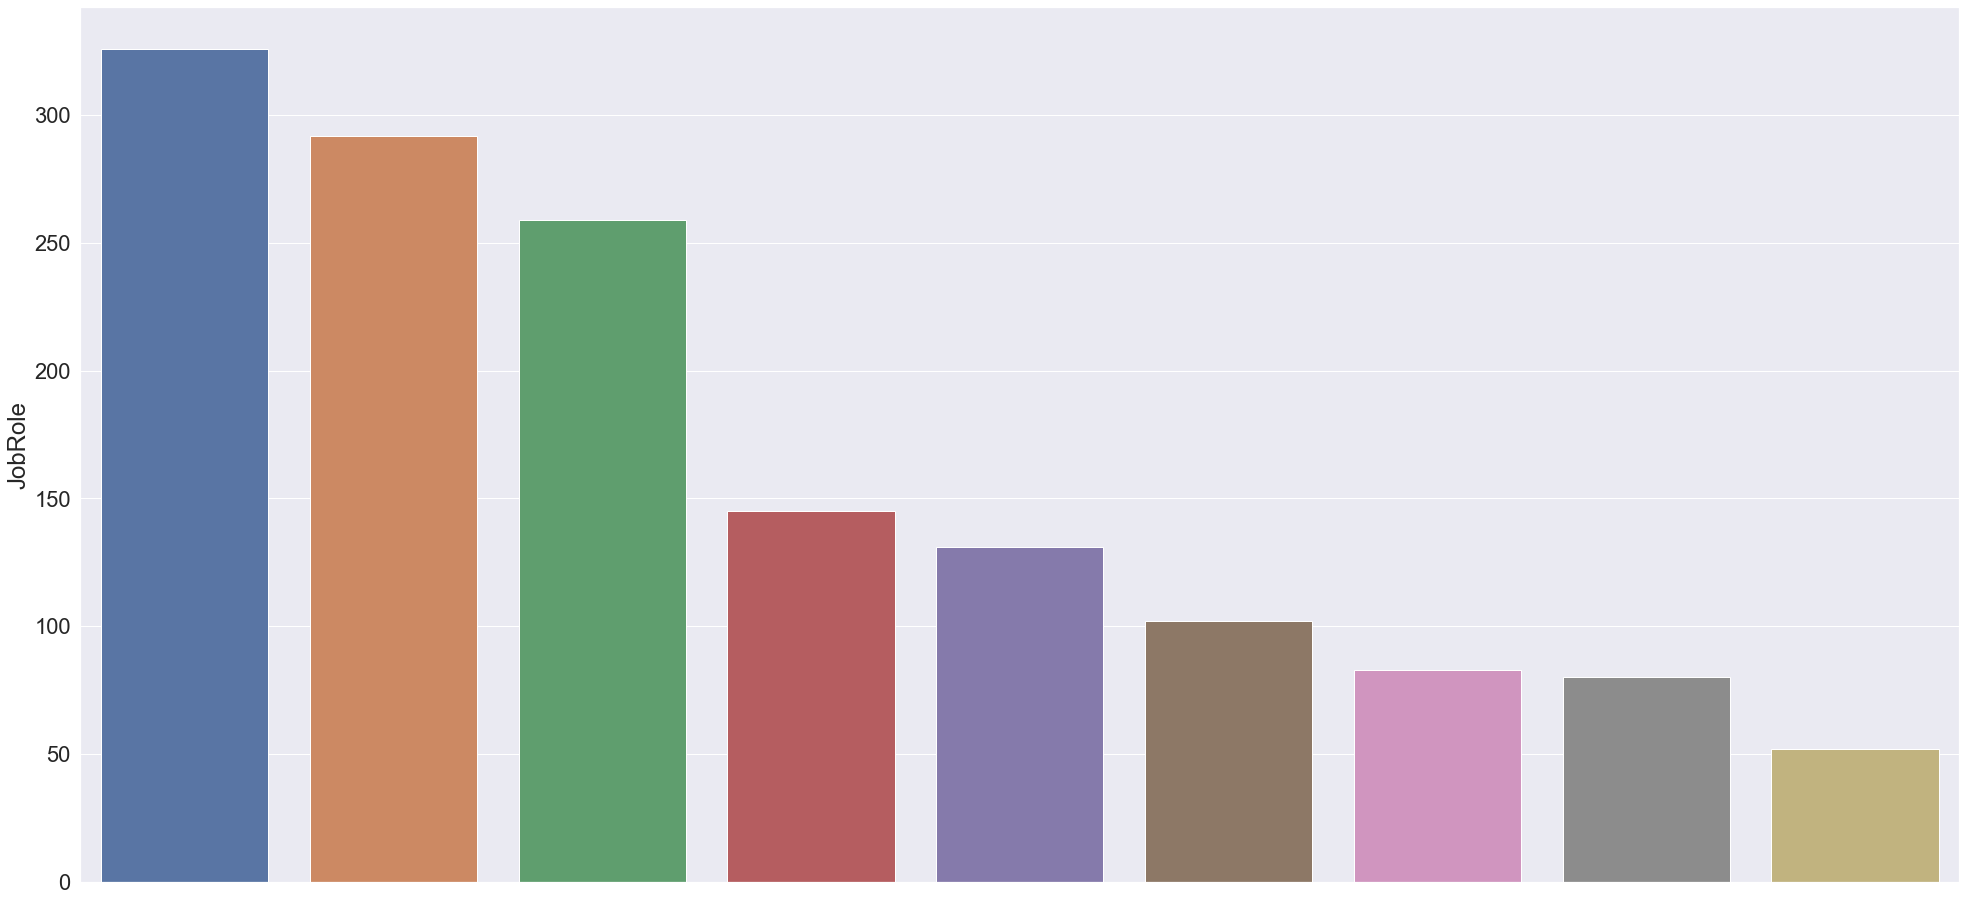

graph for JobSatisfaction: total = 4


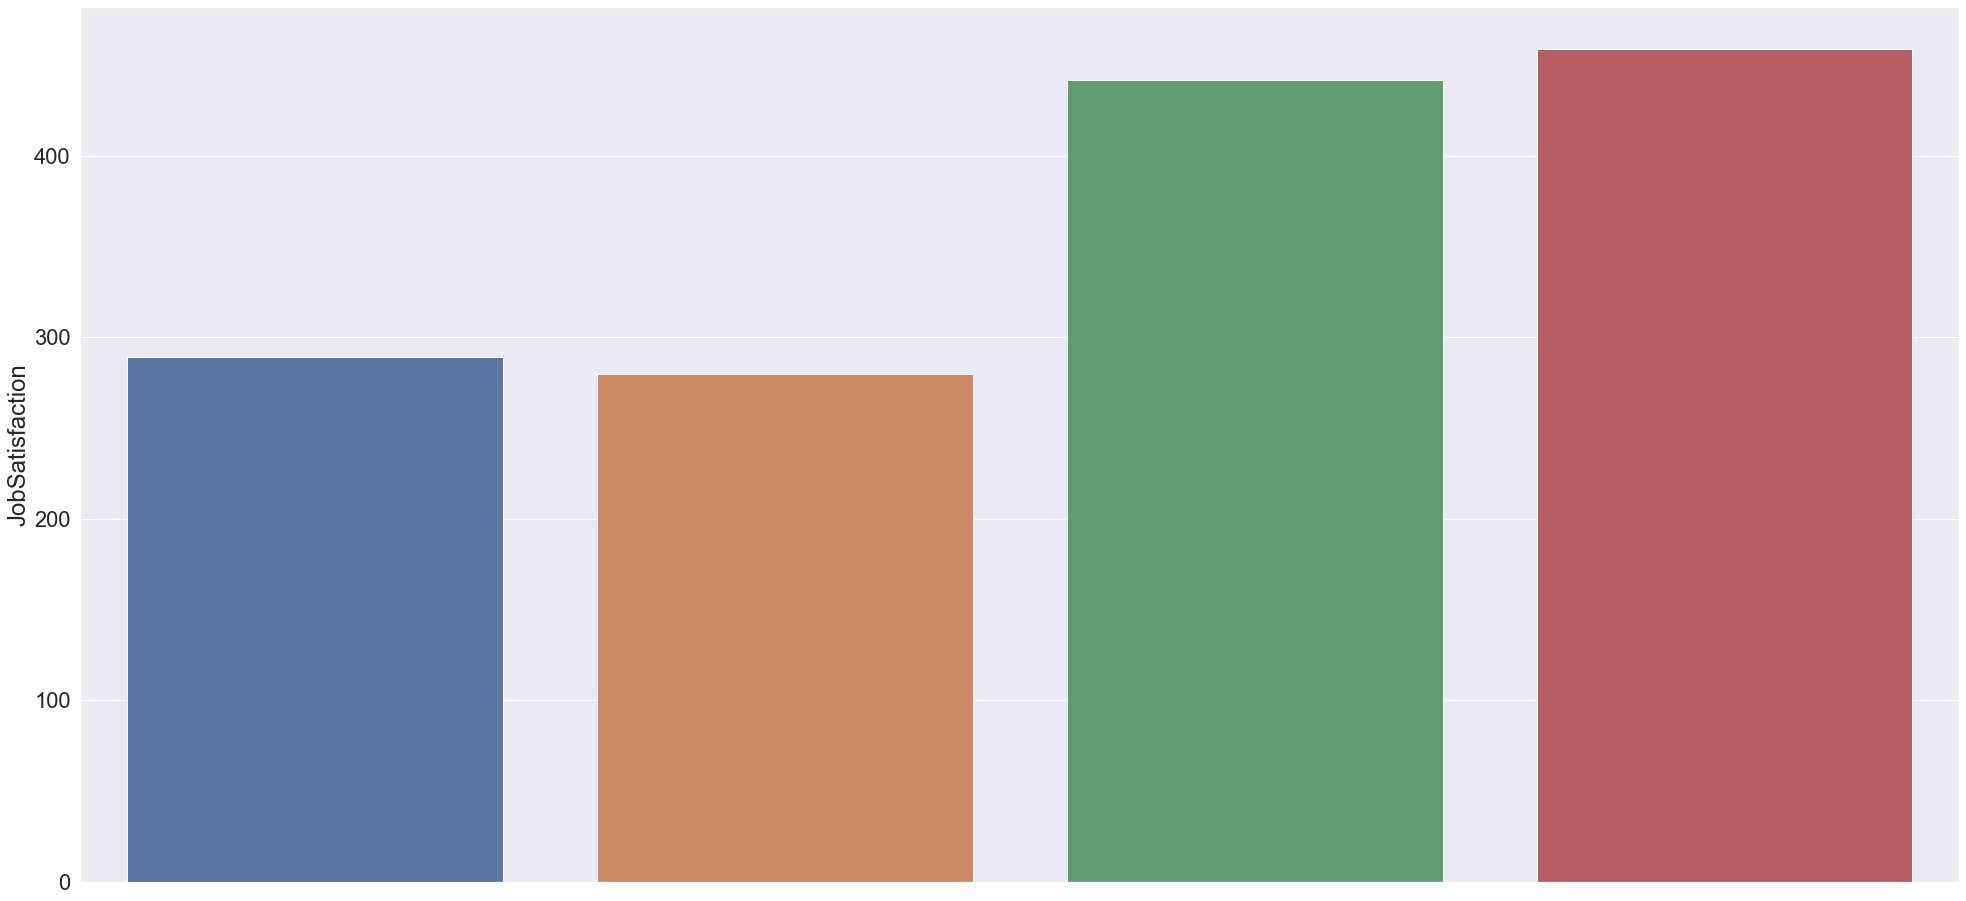

graph for MaritalStatus: total = 3


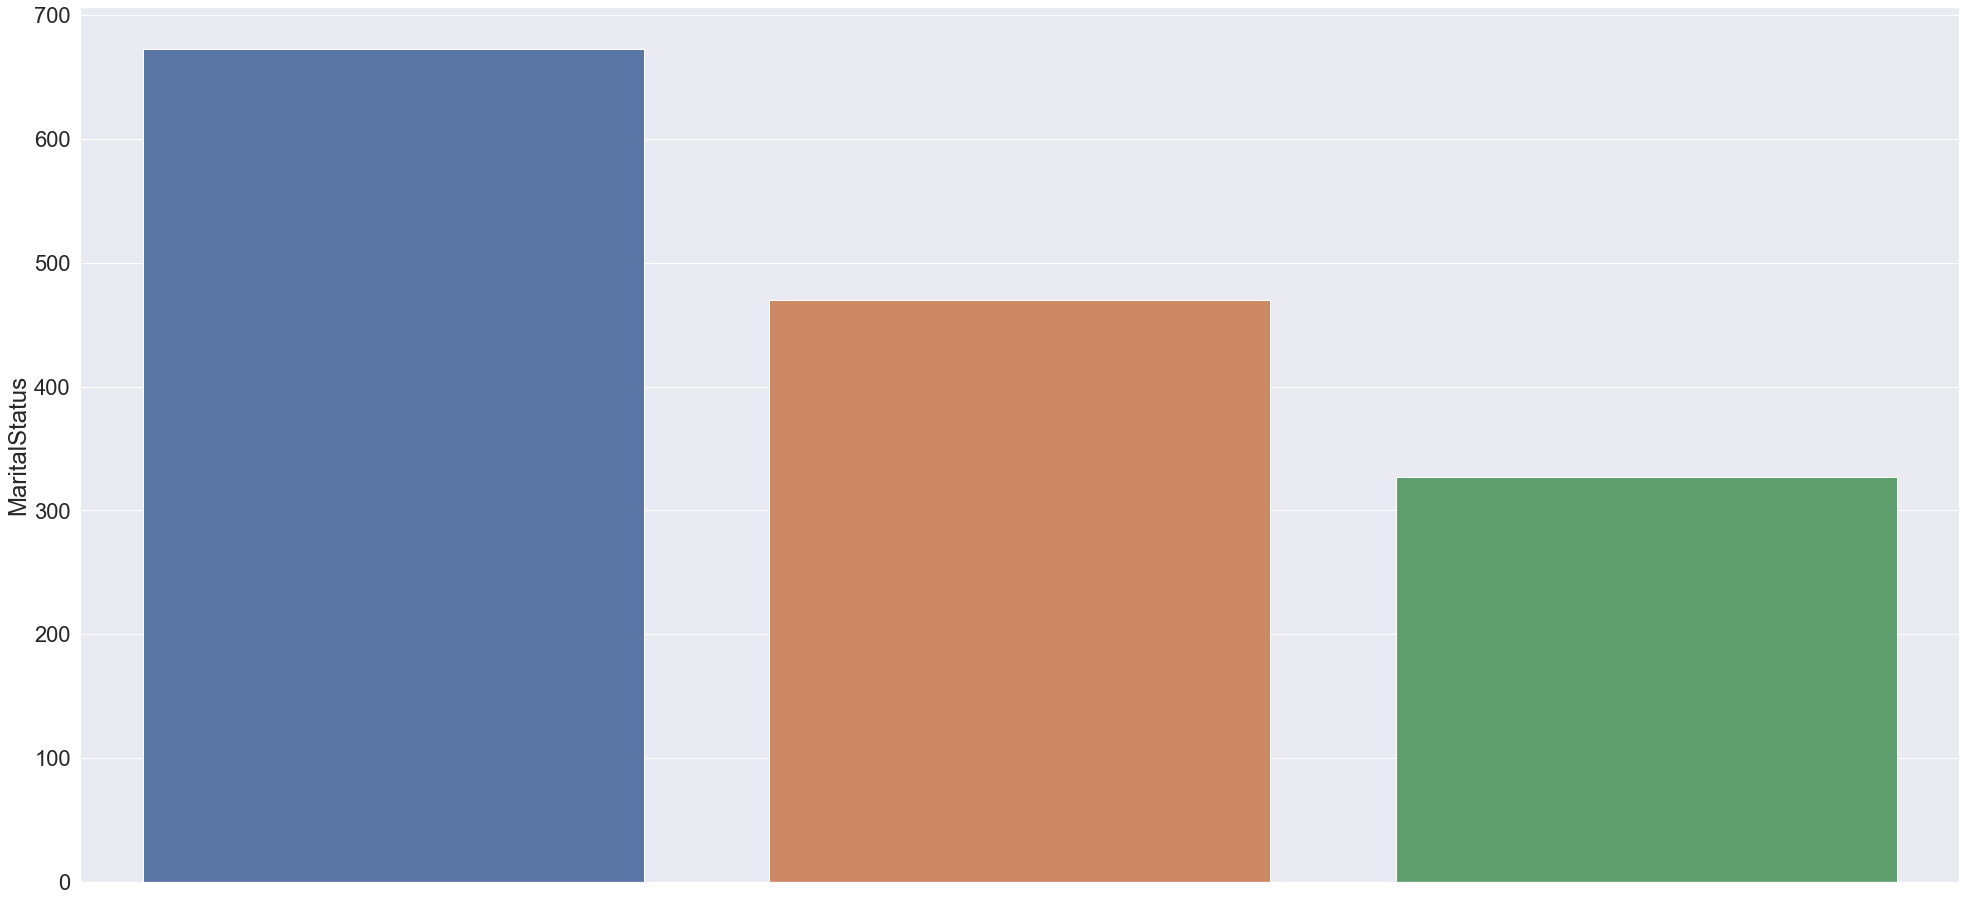

graph for OverTime: total = 2


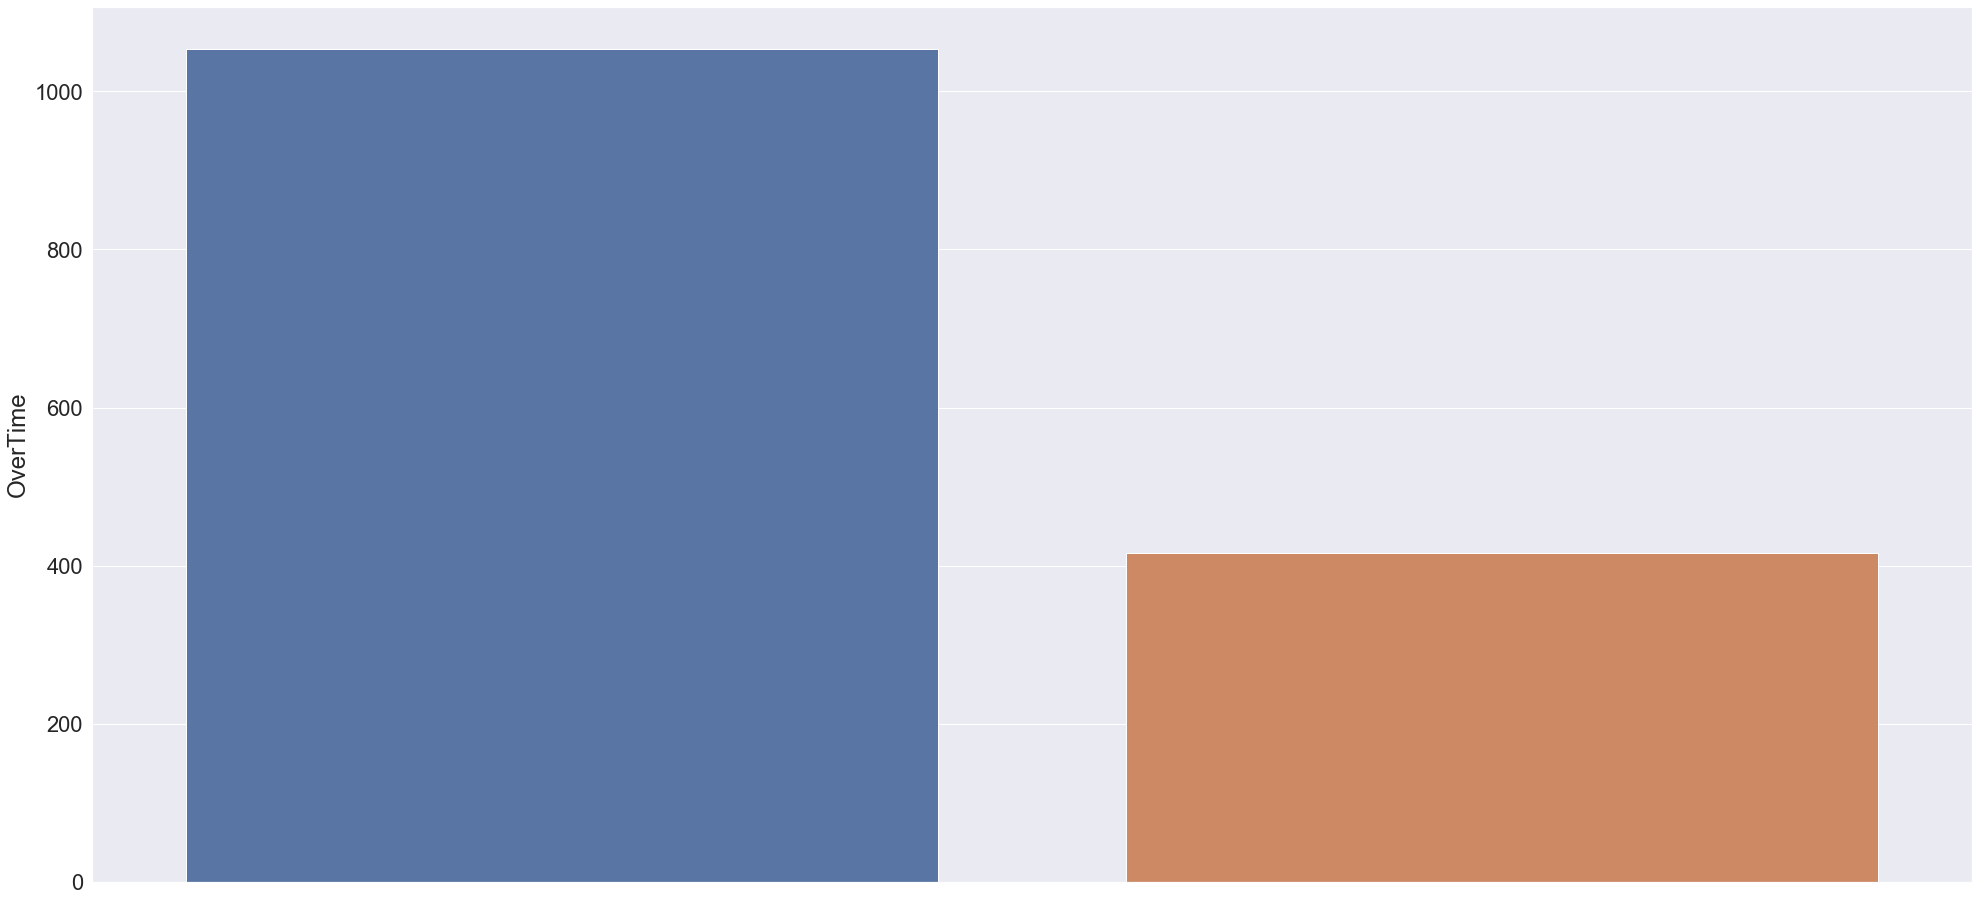

graph for PerformanceRating: total = 2


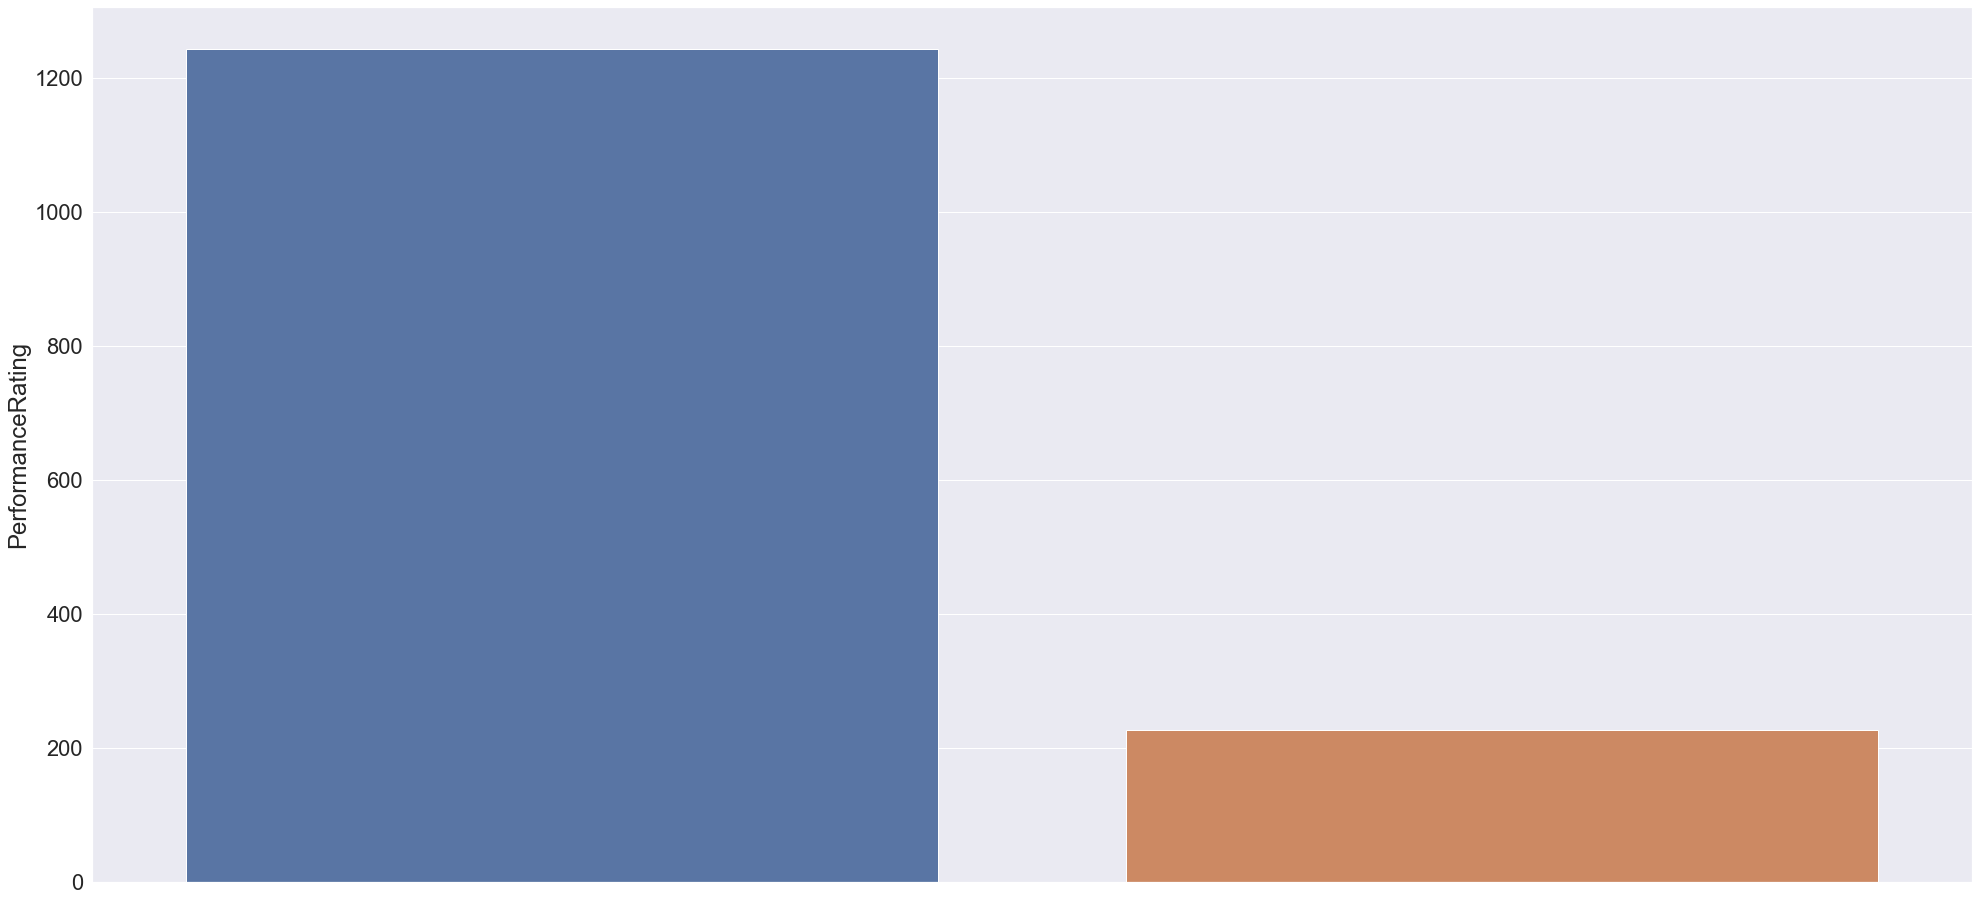

graph for RelationshipSatisfaction: total = 4


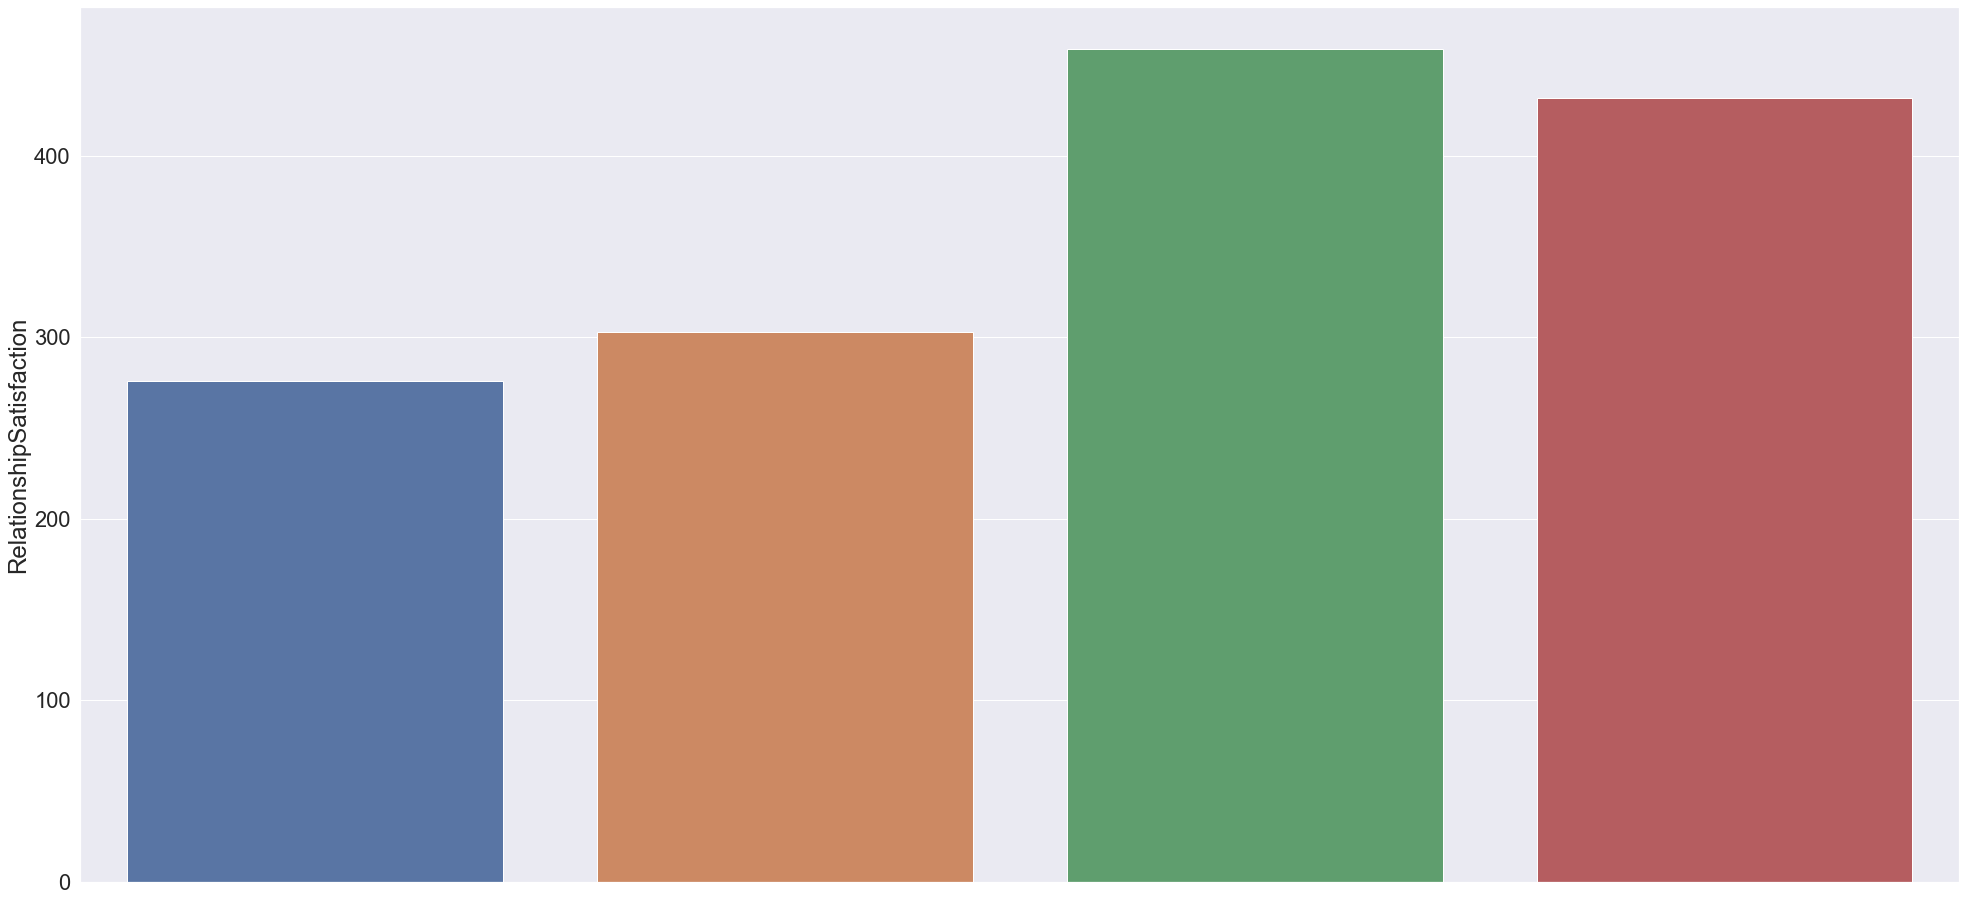

In [20]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_yticklabels(), rotation=45)
    plt.show()

Here we can see one of the most important categories that we want to look at
attrition is ~ 14%
There are more single and divorced than married people at the company
Most people receive a 3 on the performance rating... interesting that 
no one received a 1 or a 2
only 15.3 of the top performers receive a 4... it will be interesting to see 
if they leave or stay


let's do pivot tables
We will look at the categorical columns and compare them with attrition
Let's make a few more columns where we have counts of attrition yes and no

In [21]:
df_cat['AttritYes'] = df_cat['Attrition'].apply(lambda x: 1 if x =='Yes' else 0)
df_cat['AttritNo'] = df_cat['Attrition'].apply(lambda x: 1 if x =='No' else 0)

p_columns = ['BusinessTravel',
             'Department',
             'Education',
             'EducationField',
             'EnvironmentSatisfaction',
             'JobInvolvement',
             'JobLevel',
             'JobRole',
             'JobSatisfaction',
             'MaritalStatus',
             'OverTime',
             'PerformanceRating',
             'RelationshipSatisfaction']

for i in p_columns:
    m = df_cat.pivot_table(columns=i, values = ['AttritYes','AttritNo'], aggfunc=np.sum)
    m.loc['PercentAttrit'] = 0
    for a in m:
        m.loc['PercentAttrit'][a] = ((m[a][1])/(m[a][0]+m[a][1]))*100
    print(m)
    print("")

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
AttritNo               138                208            887
AttritYes               12                 69            156
PercentAttrit            8                 24             14

Department     Human Resources  Research & Development  Sales
AttritNo                    51                     828    354
AttritYes                   12                     133     92
PercentAttrit               19                      13     20

Education        1    2    3    4   5
AttritNo       139  238  473  340  43
AttritYes       31   44   99   58   5
PercentAttrit   18   15   17   14  10

EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
AttritNo                     20            517        124      401     71   
AttritYes                     7             89         35       63     11   
PercentAttrit                25             14         22       13     13   

EducationField  Technical Degree  
AttritNo 

C:\Users\needh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\needh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Pivot table analysis
There is a spike in those who travel frequently
Research and development have lower rates than sales and human resources
Education field FILL THIS IN
Low Environment satisfaction is higher than the others... makes sense
Lower Job involvement -> higher attrition
Job Role FILL THIS IN
Single people leave more... makes sense
Those who work overtime are more likely to leave
Worryingly performance rating is equal... indicates we are losing our top performers 
just as quickly as average performers
More likely to leave with lowest relationship satisfaction score, other scores don't matter